

```
# This is formatted as code
```
                   
## **Introduction to Causality**  (NUID : 002709300)

###**What is Causality?**

Causality seeks to identify the relationships where one variable (cause) directly affects another (effect). The concept of causality in machine learning is deeply intertwined with the idea of understanding and modeling the cause-and-effect relationships in data, beyond the simple correlations often captured by traditional machine learning models.




##**Causal impact**

The simplest use case for causality is to investigate a single intervention: how does a known event affect a dependent variable? The Causal Impact analysis attempts to solve the problem if there is an impact of intervention or action on the time-series data. In real-world cases, there are many instances that the only data we have is the result of our experiment and not the data if we are not doing any experiment or intervention (counterfactual).






 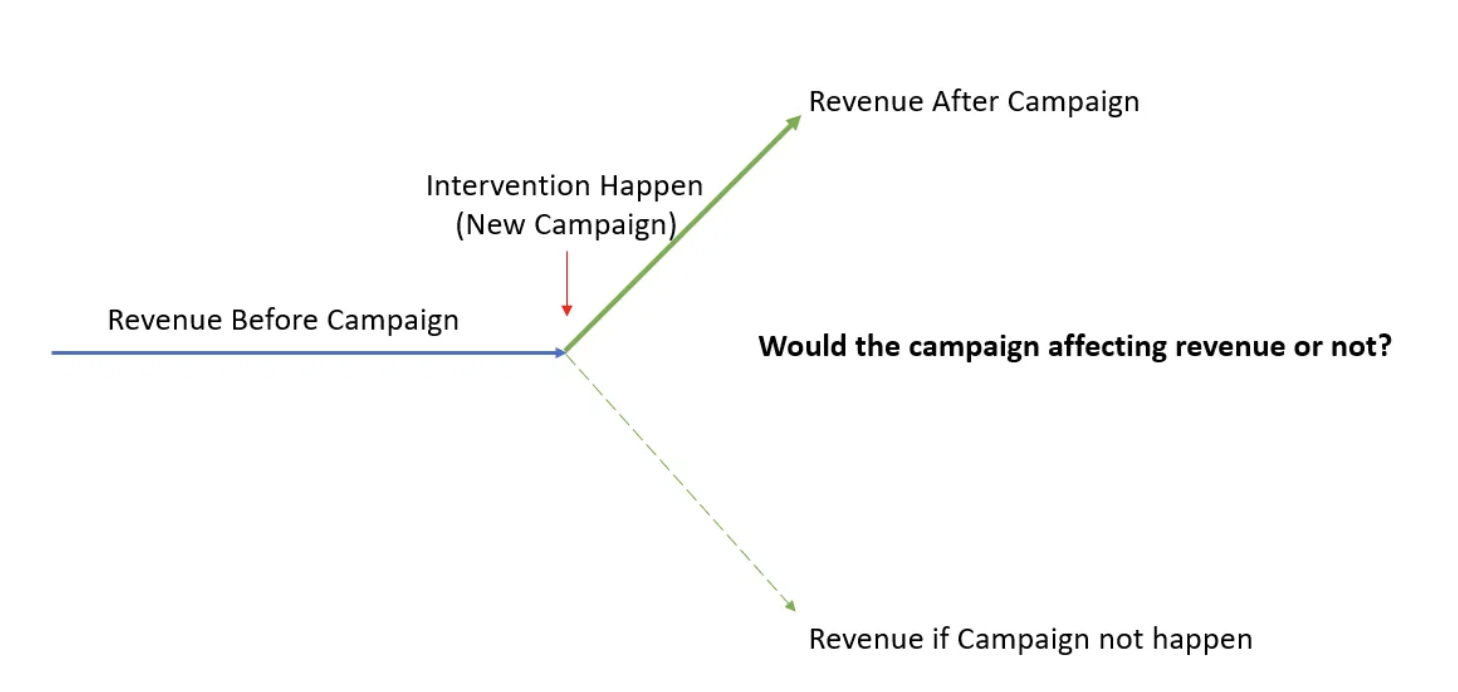




 Causality is a broad topic so we will go with the "ladder of causality" proposed by Judea Perl:

 * **association (seeing):** this covers any analysis focused on dependence (e.g. correlation); if A shifts, B must shift as well - but not necessarily because of each other. Majority of stats / ML models fall in that category

* **intervention (doing):** this goes a step further - in an experimental design we impose A and watch if B happens → change in A leads to change in B, but no the other way round. Our model explicitly encodes a potential causal relationship

* **causality (imagining):** this is the most interesting case, as it involves counterfactuals. In his book, Pearl describes imagining as the ability to conjure up a parallel universe in your head and play through fictitious scenarios. Whereas an intervention is more difficult to prove than an association, it goes without saying that a parallel universe can never be ‘proven’.



###**What is need for Causality and how is it different from Correlation?**

* **Informed Decision Making:** Causality provides actionable insights for making effective decisions in policy-making, business, healthcare, and other areas.

* **Understanding Mechanisms:** It goes beyond correlation to uncover why relationships between variables exist, which is essential in scientific research and theory development.

* **Effective Interventions:** In fields like healthcare and public policy, causality is vital for designing interventions and treatments that truly address the root cause of issues.

* **Risk Management:** It helps in identifying and mitigating risks by understanding the true cause-and-effect relationships, preventing actions based on false correlations

Correlation refers to a statistical relationship or association between two or more variables. When one variable changes, there is a tendency for the other variable to change in a predictable manner.


###**Key Differences between causality and correlation**

* **Implication of Relationship:**

  Correlation: Simply shows that two variables are related.

  Causality: Indicates that one variable actually affects the other.

* **Method of Determination:**

  Correlation: Can be determined using statistical correlation coefficients.

  Causality: Requires more rigorous experimentation or statistical analysis to establish.

* **Interpretation:**

  Correlation: Should be interpreted cautiously; a high correlation does not necessarily mean that there is a causal relationship.

  Causality: Provides a basis for understanding the mechanism and effect of changes in one variable on another.

##**Key concepts in understanding Causality or Causal Inference**

* **Counterfactuals:** These are the hypothetical scenarios for what would have happened under different circumstances.

Example: In a medical study, for a patient who received treatment A and recovered, the counterfactual question is: "What would have happened if the same patient had received treatment B instead?"

* **Intervention:**Changing a variable to observe the effect on another (like in controlled experiments).

* **Potential Outcomes Framework:**

These are also known as Rubin causal model. The Potential Outcomes Framework involves considering the possible outcomes (or potential outcomes) for each individual in a study under different scenarios or treatments

* **Cause and Effect:** A cause is something that produces an effect, change, or result.

* **Correlation vs. Causation:** It's important to distinguish between correlation (when two variables move together) and causation (where one variable directly influences another). Just because two variables are correlated does not necessarily mean one causes the other.

* **Confounding Variables:** These are extraneous variables that can influence both the cause and effect, leading to false causal conclusions if not properly controlled or accounted for.

* **Causal Diagrams and Models:** Graphical representations like Directed Acyclic Graphs (DAGs) are used to illustrate and analyze causal relationships, helping to identify potential confounding variables and causal paths.




##**Causal Discovery**

Identifying causal relationships within a set of variables, typically from observational data. Unlike causal inference, which usually tests a specific causal hypothesis, causal discovery aims to uncover the underlying causal structure of the data without prior assumptions about which variables are causes and which are effects


##**Causal Inference:**

* It involves methods to deduce causality from data, often observational data where controlled experiments are not possible.

* Techniques include **instrumental variables, propensity score matching, and difference-in-differences methods.**

### **Some of the known techniques in Causal Inference:**

**Randomized Controlled Trials (RCTs):**

* In an RCT, subjects are randomly assigned to either a treatment group or a control group.Randomization ensures that the groups are comparable, thereby isolating the effect of the treatment.

**Propensity Score Matching:**

* Used in observational studies to mimic randomization. Subjects are matched based on their propensity scores, which represent the probability of receiving the treatment given their observed characteristics.

**Instrumental Variables (IV):**

* IVs are used when randomization is not possible and when there is concern about unmeasured confounding variables. An instrumental variable is correlated with the treatment but not directly with the outcome, except through its effect on the treatment.


**Regression Discontinuity Design (RDD):**

* Applied when the treatment is assigned based on a cutoff in an assignment variable. RDD compares outcomes just above and below the cutoff to estimate the causal effect.

**Difference-in-Differences (DiD):**

* Compares the changes in outcomes over time between a group that receives the treatment and a group that does not.
Useful for evaluating the impact of policy changes or interventions.

**Granger Causality:**

* Used in time series analysis. Tests whether past values of one variable can predict the future values of another variable, suggesting a potential causal relationship.

**Causal Diagrams and Graphical Models:**

* Utilize diagrams (like Directed Acyclic Graphs, DAGs) to represent and reason about causal relationships.
Help in identifying potential confounders and causal pathways.


### **Example to identify the Causal Inference**

In the below example, I have taken "Water bodies quality data" dataset to identify the causal inference of various factors affecting the water quality using LiNGAM.


* **LiNGAM** is an approach to explore causal structures based on observed data and a functional causal model. Unlike constraint-based methods or score-based methods, it assumes a linear functional form for the observed variables and posits that the error variables follow a non-Gaussian distribution, a so-called semi-parametric setting

**Fundamental idea of LiNGAM:**

LiNGAM is a functional causal model approach constructed based on the following assumptions.

* Base function: linear structural equation
* Error term follows non-Gaussian distribution
* Graph is acyclic

With these assumptions, it is possible to identify causal graphs because the distribution of observed variables differs when the zero/nonzero pattern of the causal graph differs even in equivalence classes.



In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install chardet
import chardet

with open("/content/Water_pond_tanks_2021.csv", 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

data = pd.read_csv("/content/Water_pond_tanks_2021.csv", encoding=encoding)

In [ ]:
data.head()

STN\nCode                        Name of Monitoring Location  \
0     4368.0      KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)   
1     2353.0  KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...   
2     1790.0                       PULICATE LAKE , NELLORE DIST   
3     4391.0      CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI   
4     4921.0           ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR   

  Type Water Body      State Name  Temperature\n?C (Min)  \
0            LAKE  ANDHRA PRADESH                   24.0   
1            LAKE  ANDHRA PRADESH                   26.0   
2            LAKE  ANDHRA PRADESH                   18.0   
3            TANK  ANDHRA PRADESH                   22.0   
4         Wetland  ANDHRA PRADESH                   21.0   

   Temperature\n?C (Max) Dissolved Oxygen (mg/L) (Min)  \
0                   27.0                           3.2   
1                   29.0                           3.0   
2                   24.0                           4.2   
3                   29.0                           5.4   
4                   30.0                           5.4   

  Dissolved Oxygen (mg/L) (Max) pH (Min)  pH (Max)  \
0                           6.5      7.0       8.0   
1                           6.8      6.9       7.8   
2                           6.0      7.2       8.2   
3                           6.2      6.3       7.9   
4                           6.5      7.3       8.0   

  Conductivity (?mhos/cm) (Min) Conductivity (?mhos/cm) (Max)  \
0                           245                          5160   
1                           599                          1179   
2                         28000                         56900   
3                           180                           476   
4                           496                           734   

  BOD (mg/L) (Min) BOD (mg/L) (Max) Nitrate N + Nitrite N(mg/L) (Min)  \
0              1.6              3.2                              1.02   
1              1.9              4.6                              0.77   
2              2.4              2.8                              1.20   
3              1.0              2.5                              0.34   
4              1.0              2.3                              0.35   

  Nitrate N + Nitrite N(mg/L) (Max) Fecal Coliform (MPN/100ml) (Min)  \
0                              3.60                                9   
1                              3.56                               15   
2                              1.64                                3   
3                              2.30                               24   
4                              1.00                               43   

  Fecal Coliform (MPN/100ml) (Max) Total Coliform (MPN/100ml) (Min)  \
0                               21                              120   
1                               23                              150   
2                                3                               47   
3                              365                              170   
4                              289                              240   

  Total Coliform (MPN/100ml) (Max)  
0                              210  
1                              240  
2                              150  
3                              549  
4                              727

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 8   pH (Min)                           620 non-null    object 
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      618 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      618 non-null    object 

###Data Preprocessing

In [ ]:
data=data.replace('-', np.nan)

In [ ]:
data=data.replace('\n4', '',regex=True)

In [ ]:
data.iloc[:,4:19]=data.iloc[:,4:19].astype(float)

In [ ]:
data['Total Coliform (MPN/100ml) (Max)']=data['Total Coliform (MPN/100ml) (Max)'].astype(float)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      618 non-null    float64
 7   Dissolved Oxygen (mg/L) (Max)      618 non-null    float64
 8   pH (Min)                           620 non-null    float64
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      615 non-null    float64
 11  Conductivity (?mhos/cm) (Max)      615 non-null    float64

In [ ]:
data['Type Water Body'].unique()

array(['LAKE', 'TANK', 'Wetland', 'POND'], dtype=object)

In [ ]:
data['State Name'].unique()

array(['ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH',
       'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL\nPRADESH',
       'JAMMU &\nKASHMIR', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA\nPRADESH', 'MADHYA PRADESH',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU', 'TELANGANA',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

###Visualization

* Distplot by features

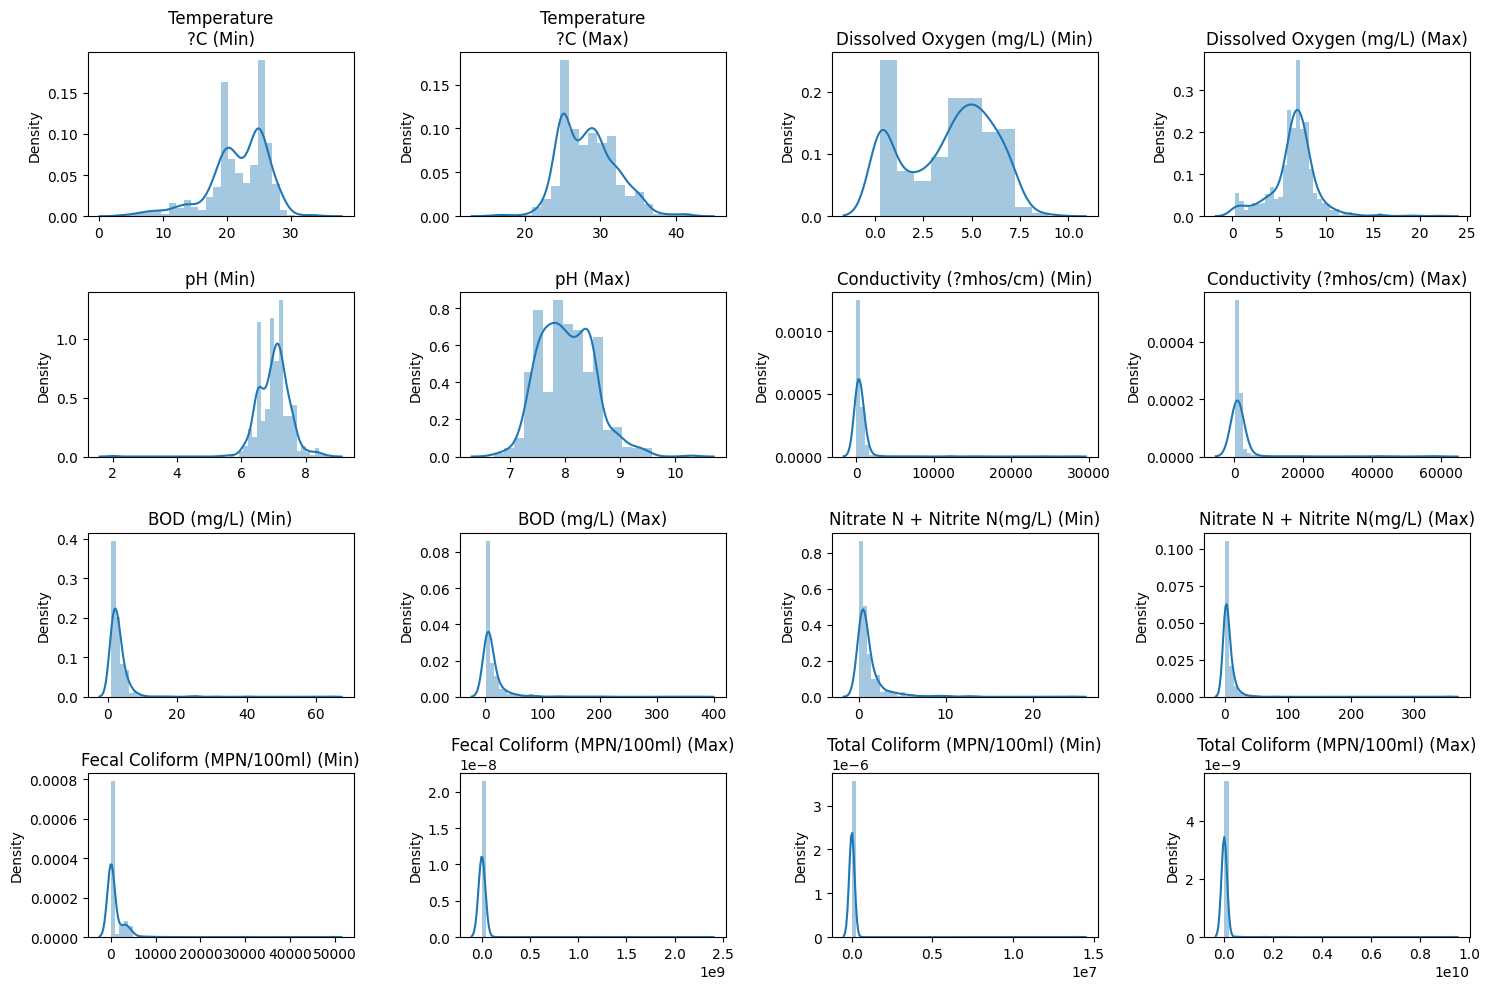

In [ ]:
col=['Temperature\n?C (Min)', 'Temperature\n?C (Max)',
       'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
       'pH (Min)', 'pH (Max)', 'Conductivity (?mhos/cm) (Min)',
       'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
       'Nitrate N + Nitrite N(mg/L) (Min)',
       'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
       'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
       'Total Coliform (MPN/100ml) (Max)']
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(4,4,i+1)
    plt.title(col[i])
    sns.distplot(data,x=data[col[i]])
plt.tight_layout()
plt.show()

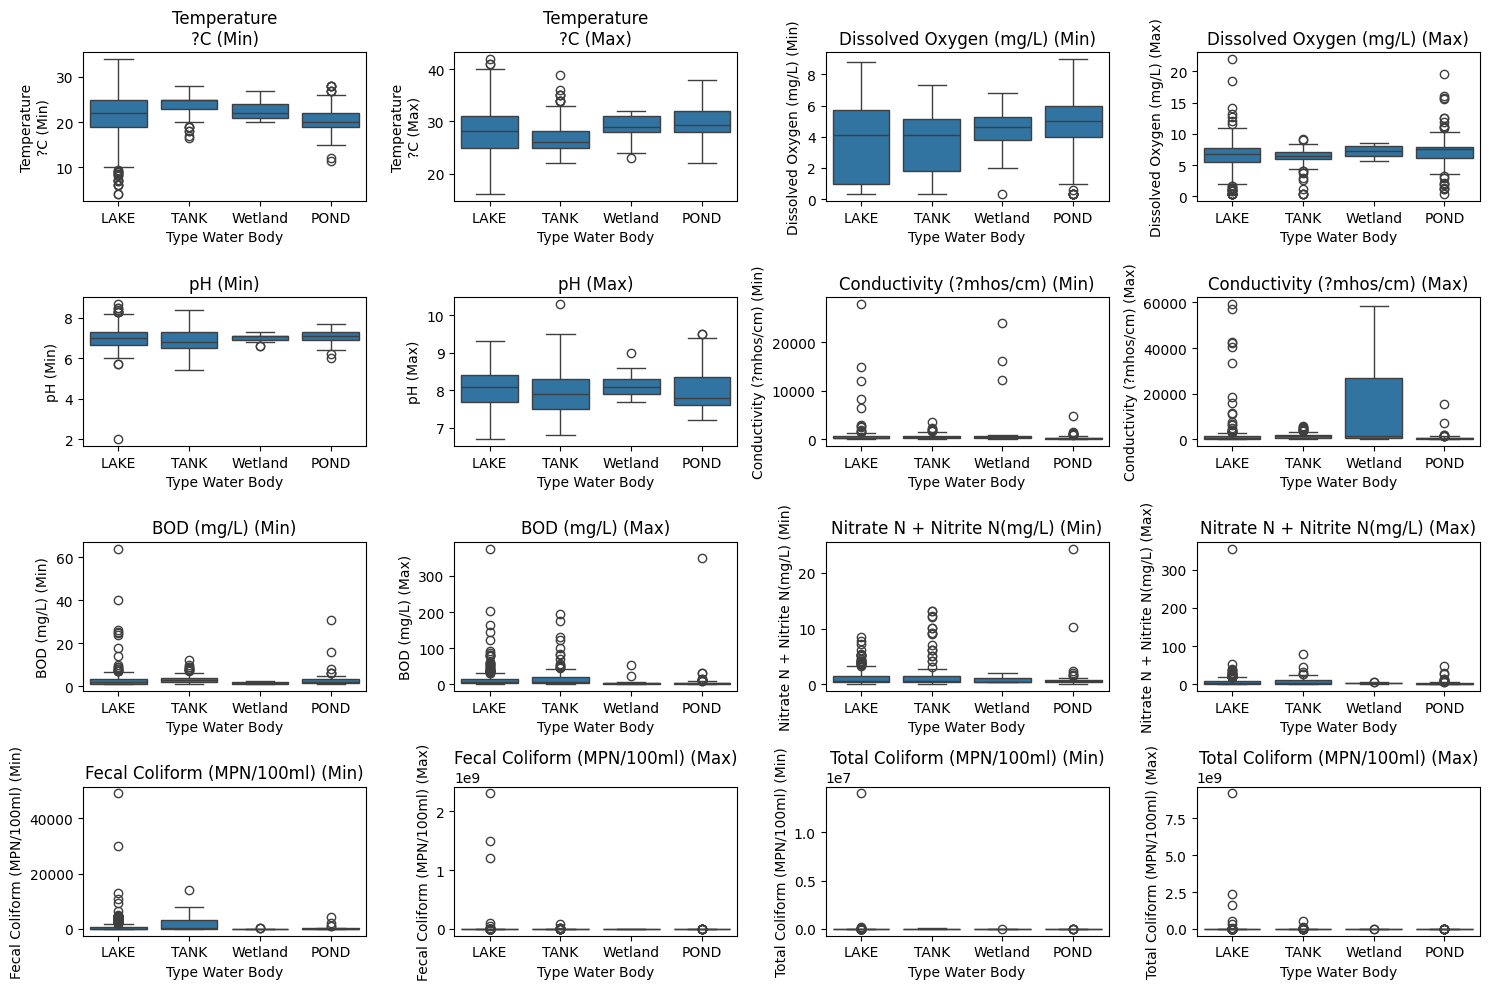

In [ ]:
##Boxplot by features


fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(4,4,i+1)
    plt.title(col[i])
    sns.boxplot(data=data,y=data[col[i]],x=data['Type Water Body'])
plt.tight_layout()
plt.show()

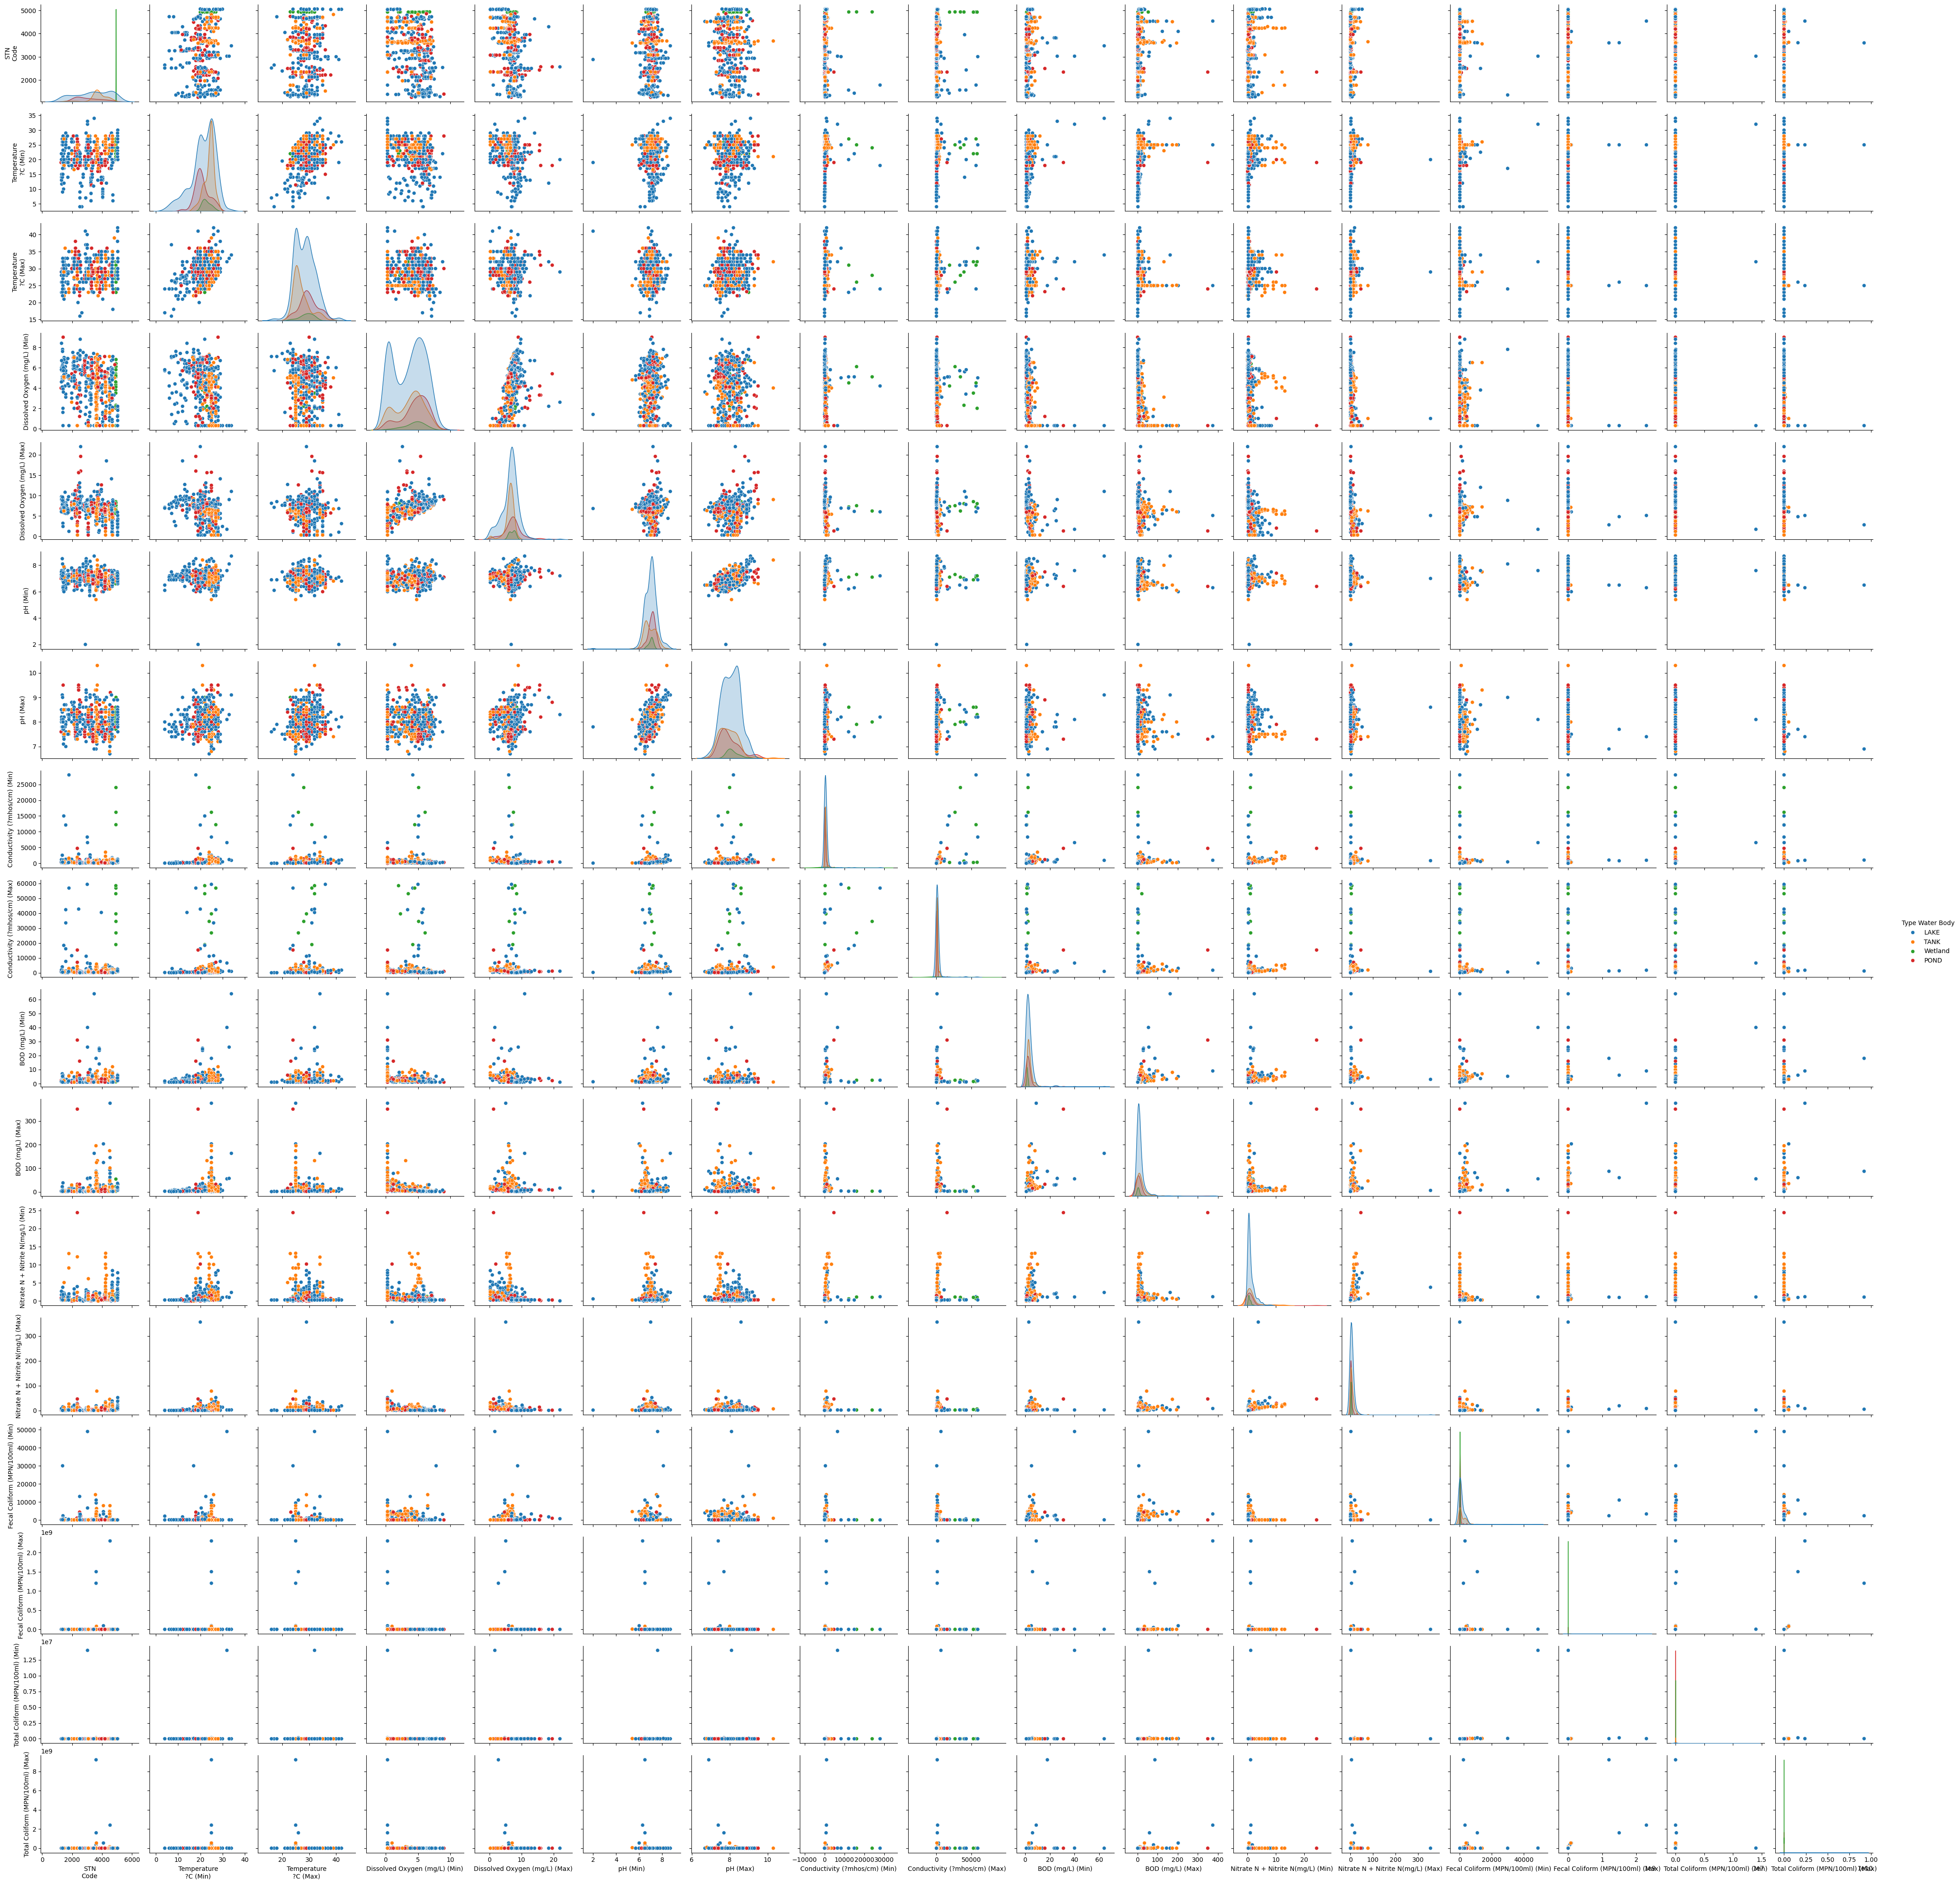

In [ ]:
#pairplot by Type water Body

sns.pairplot(data,hue='Type Water Body');

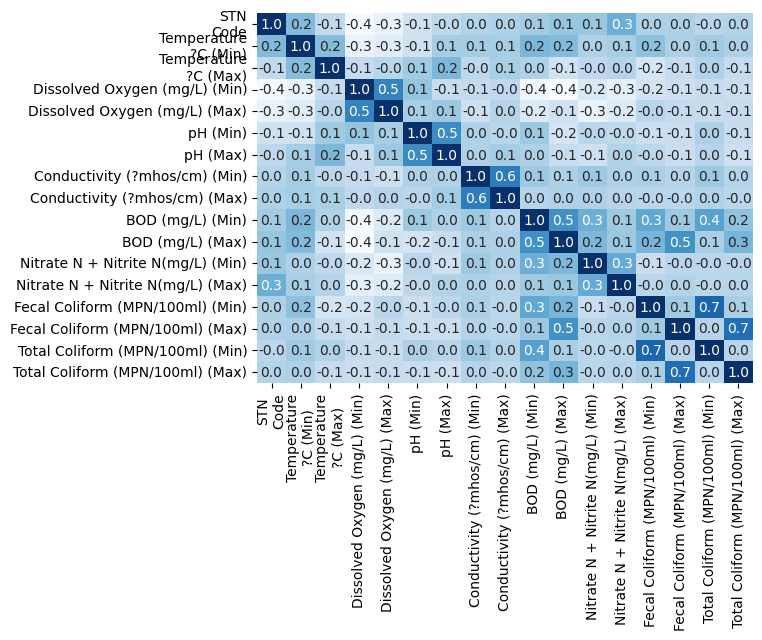

In [ ]:
#correlation heatmap

sns.heatmap(data.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f');

It seems to be difficult to find "strong correlation" among features, except min and max of same features.

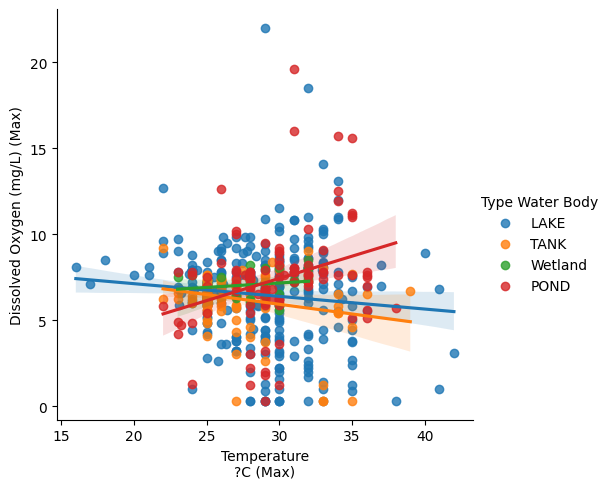

In [ ]:
sns.lmplot(data=data,x='Temperature\n?C (Max)',y='Dissolved Oxygen (mg/L) (Max)',hue="Type Water Body");

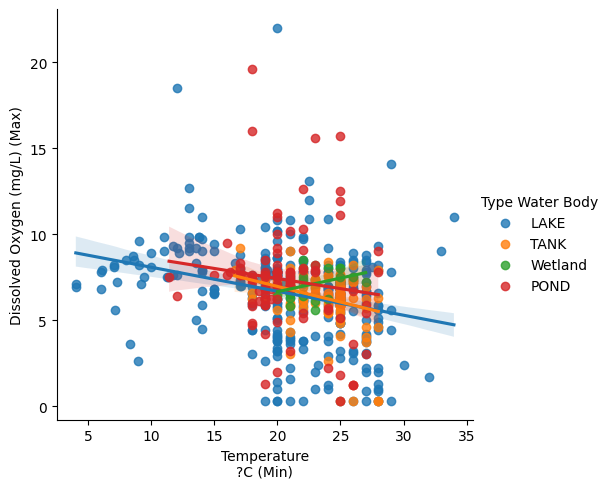

In [ ]:
sns.lmplot(data=data,x='Temperature\n?C (Min)',y='Dissolved Oxygen (mg/L) (Max)',hue="Type Water Body");

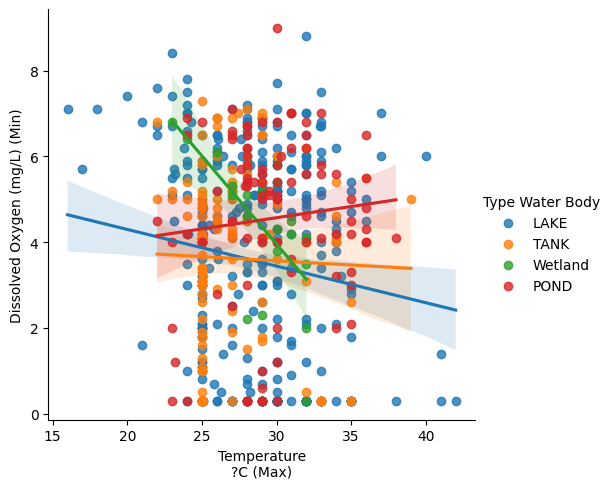

In [ ]:
sns.lmplot(data=data,x='Temperature\n?C (Max)',y='Dissolved Oxygen (mg/L) (Min)',hue="Type Water Body");

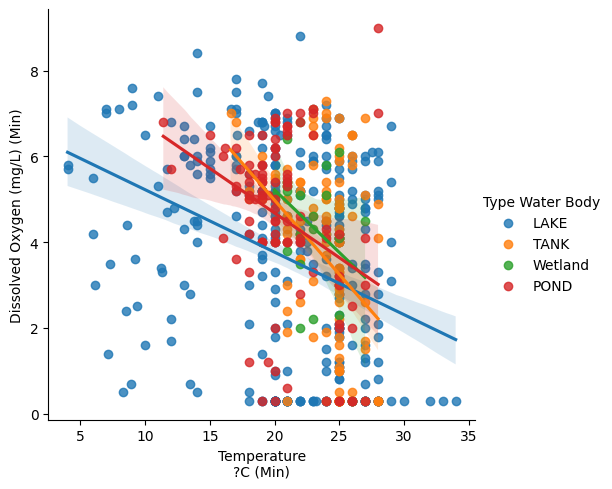

In [ ]:
sns.lmplot(data=data,x='Temperature\n?C (Min)',y='Dissolved Oxygen (mg/L) (Min)',hue="Type Water Body");

### lmplot between conductivity and pH by type water body

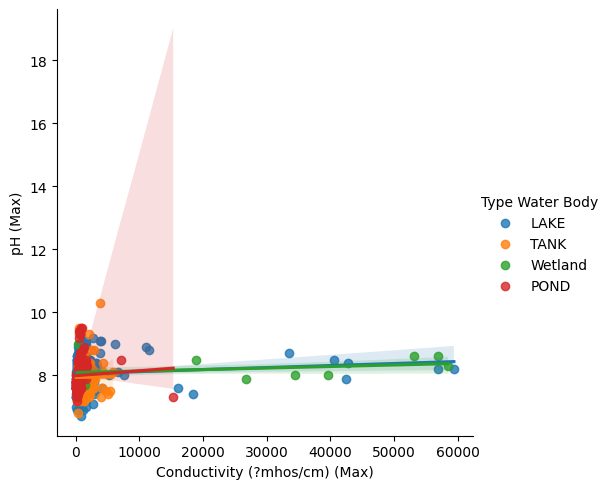

In [ ]:
#x='Conductivity (Max)', y='pH (Max)', hue="Type Water Body"
sns.lmplot(data=data,x='Conductivity (?mhos/cm) (Max)',y='pH (Max)',hue="Type Water Body");

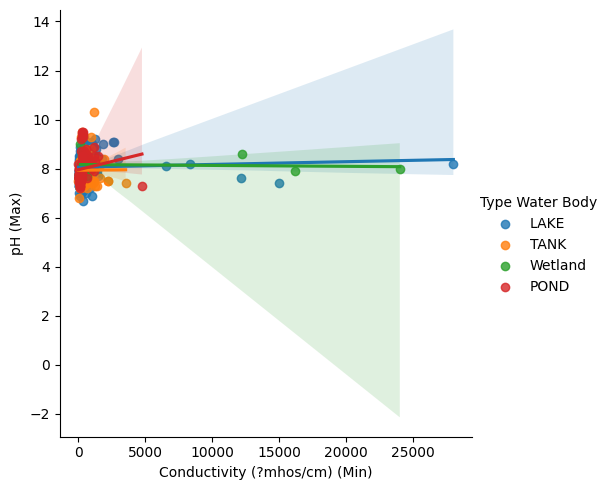

In [ ]:
#x='Conductivity (Min)', y='pH (Max)', hue="Type Water Body"
sns.lmplot(data=data,x='Conductivity (?mhos/cm) (Min)',y='pH (Max)',hue="Type Water Body");

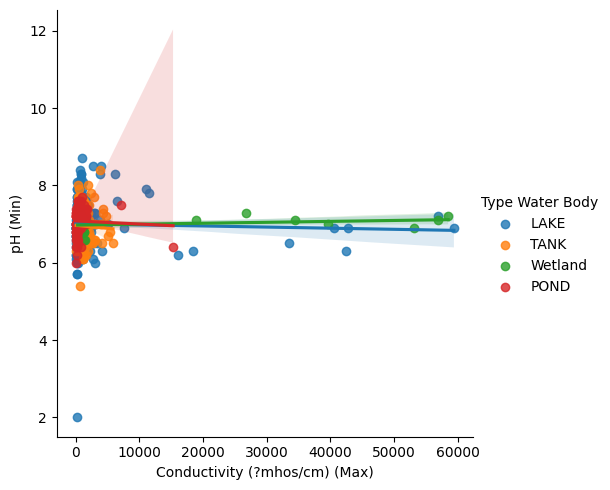

In [ ]:
#x='Conductivity (Max)', y='pH (Min)', hue="Type Water Body"
sns.lmplot(data=data,x='Conductivity (?mhos/cm) (Max)',y='pH (Min)',hue="Type Water Body");

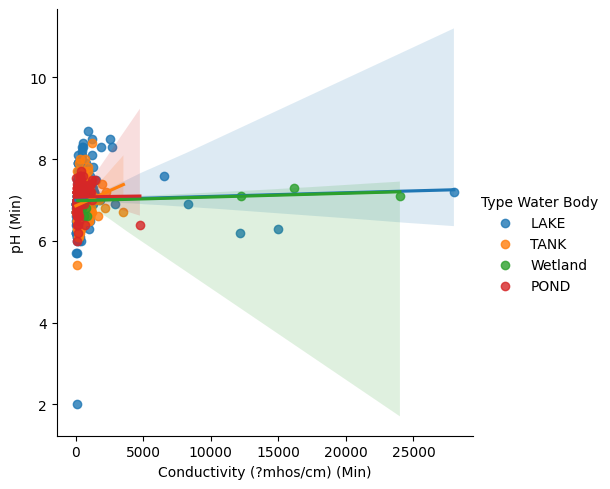

In [ ]:
#x='Conductivity (Min)', y='pH (Min)', hue="Type Water Body"
sns.lmplot(data=data,x='Conductivity (?mhos/cm) (Min)',y='pH (Min)',hue="Type Water Body");

##Causal Inference using LiNGAM



In [ ]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.7/95.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 11.5 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=965742524cf3daf7548067aea557ff68659932220b019055278646e8188db2e1
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [ ]:
!pip install pygam

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=189cffe1cac79d039f416ac6a30983eac9bcae8c92b32dbb2d20cc10568aadf8
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:

!pip install category_encoders
from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

###Data preprocessing

In [ ]:
data1 = data.drop(["STN\nCode","Name of Monitoring Location"], axis=1)

In [ ]:
data1 = data1.dropna(how='any')

In [ ]:
display(pd.DataFrame(data1.isnull().sum()).T)

Type Water Body  State Name  Temperature\n?C (Min)  Temperature\n?C (Max)  \
0                0           0                      0                      0   

   Dissolved Oxygen (mg/L) (Min)  Dissolved Oxygen (mg/L) (Max)  pH (Min)  \
0                              0                              0         0   

   pH (Max)  Conductivity (?mhos/cm) (Min)  Conductivity (?mhos/cm) (Max)  \
0         0                              0                              0   

   BOD (mg/L) (Min)  BOD (mg/L) (Max)  Nitrate N + Nitrite N(mg/L) (Min)  \
0                 0                 0                                  0   

   Nitrate N + Nitrite N(mg/L) (Max)  Fecal Coliform (MPN/100ml) (Min)  \
0                                  0                                 0   

   Fecal Coliform (MPN/100ml) (Max)  Total Coliform (MPN/100ml) (Min)  \
0                                 0                                 0   

   Total Coliform (MPN/100ml) (Max)  
0                                 0

In [ ]:
oe = ce.ordinal.OrdinalEncoder(
    cols=data1.select_dtypes(include="object")
    )

df_en = oe.fit_transform(data1)

In [ ]:
df_list = data1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

18
{'Type Water Body': 0, 'State Name': 1, 'Temperature\n?C (Min)': 2, 'Temperature\n?C (Max)': 3, 'Dissolved Oxygen (mg/L) (Min)': 4, 'Dissolved Oxygen (mg/L) (Max)': 5, 'pH (Min)': 6, 'pH (Max)': 7, 'Conductivity (?mhos/cm) (Min)': 8, 'Conductivity (?mhos/cm) (Max)': 9, 'BOD (mg/L) (Min)': 10, 'BOD (mg/L) (Max)': 11, 'Nitrate N + Nitrite N(mg/L) (Min)': 12, 'Nitrate N + Nitrite N(mg/L) (Max)': 13, 'Fecal Coliform (MPN/100ml) (Min)': 14, 'Fecal Coliform (MPN/100ml) (Max)': 15, 'Total Coliform (MPN/100ml) (Min)': 16, 'Total Coliform (MPN/100ml) (Max)': 17}


###**Setting prior knowledge**

Exogenous_variables :"Type Water Body", "State Name"

Causal relationship : "pH (Max)" and "pH (Min)", 'Temperature\n?C (Min)' and 'Temperature\n?C (Max)', 'Dissolved Oxygen (mg/L) (Min)' and 'Dissolved Oxygen (mg/L) (Max)'

In [ ]:
prior_knowledge = make_prior_knowledge(
    18,
    exogenous_variables = [df_dict["Type Water Body"], df_dict["State Name"]],
    paths = [
             [df_dict["pH (Max)"], df_dict["pH (Min)"],[df_dict['Temperature\n?C (Min)'],df_dict['Temperature\n?C (Max)'],df_dict['Dissolved Oxygen (mg/L) (Min)'],df_dict['Dissolved Oxygen (mg/L) (Max)']]],
             ],

)

### LiNGAM modelling

In [ ]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en)

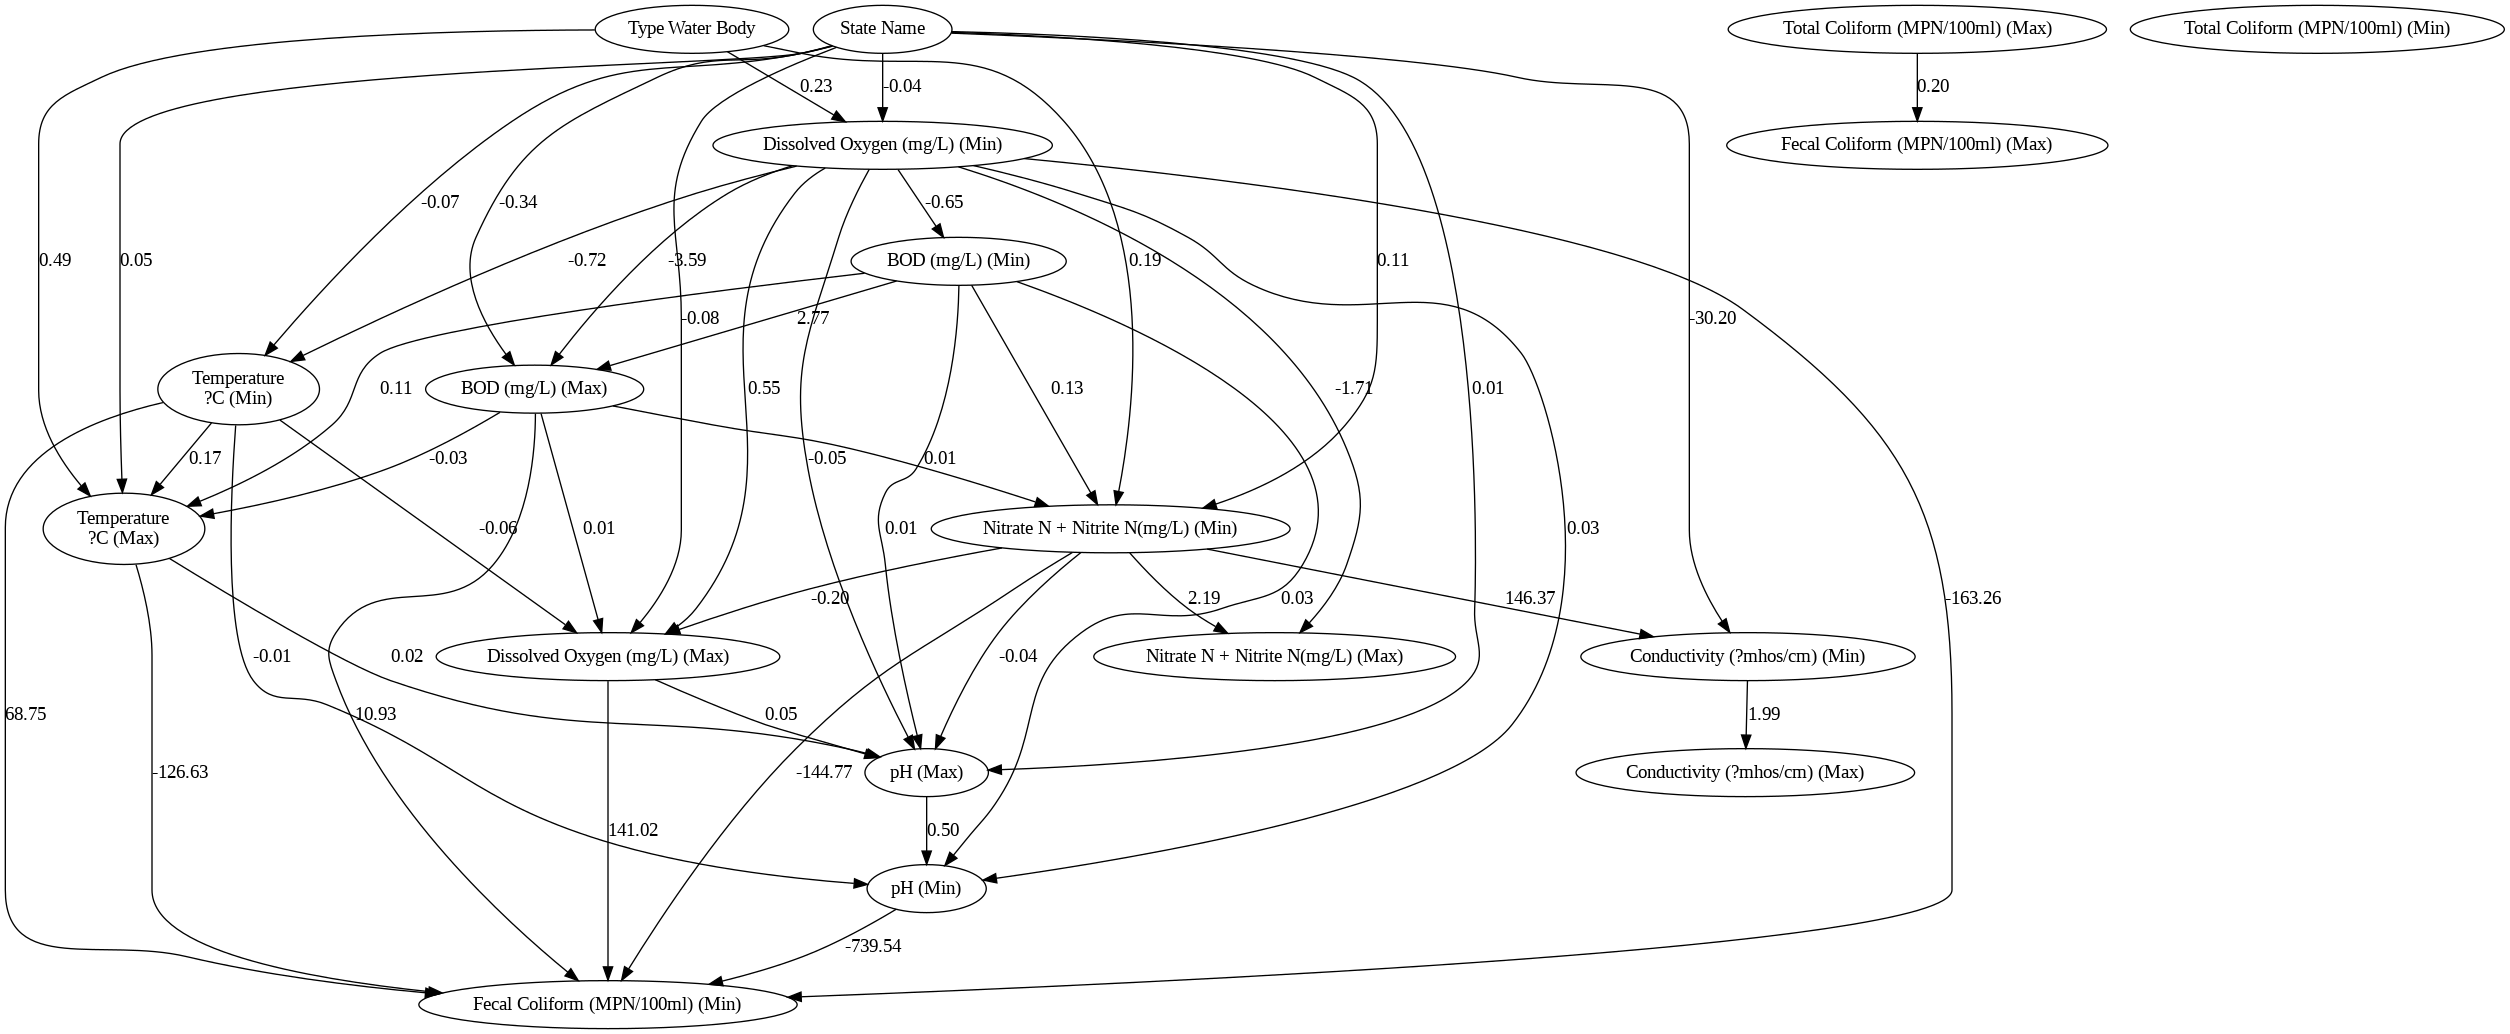

In [ ]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df_en.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

* **-1 LiNGAM with Linear Regression (Target Variable : "pH (Max)")**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df_en.drop(["pH (Max)"], axis=1), df_en["pH (Max)"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


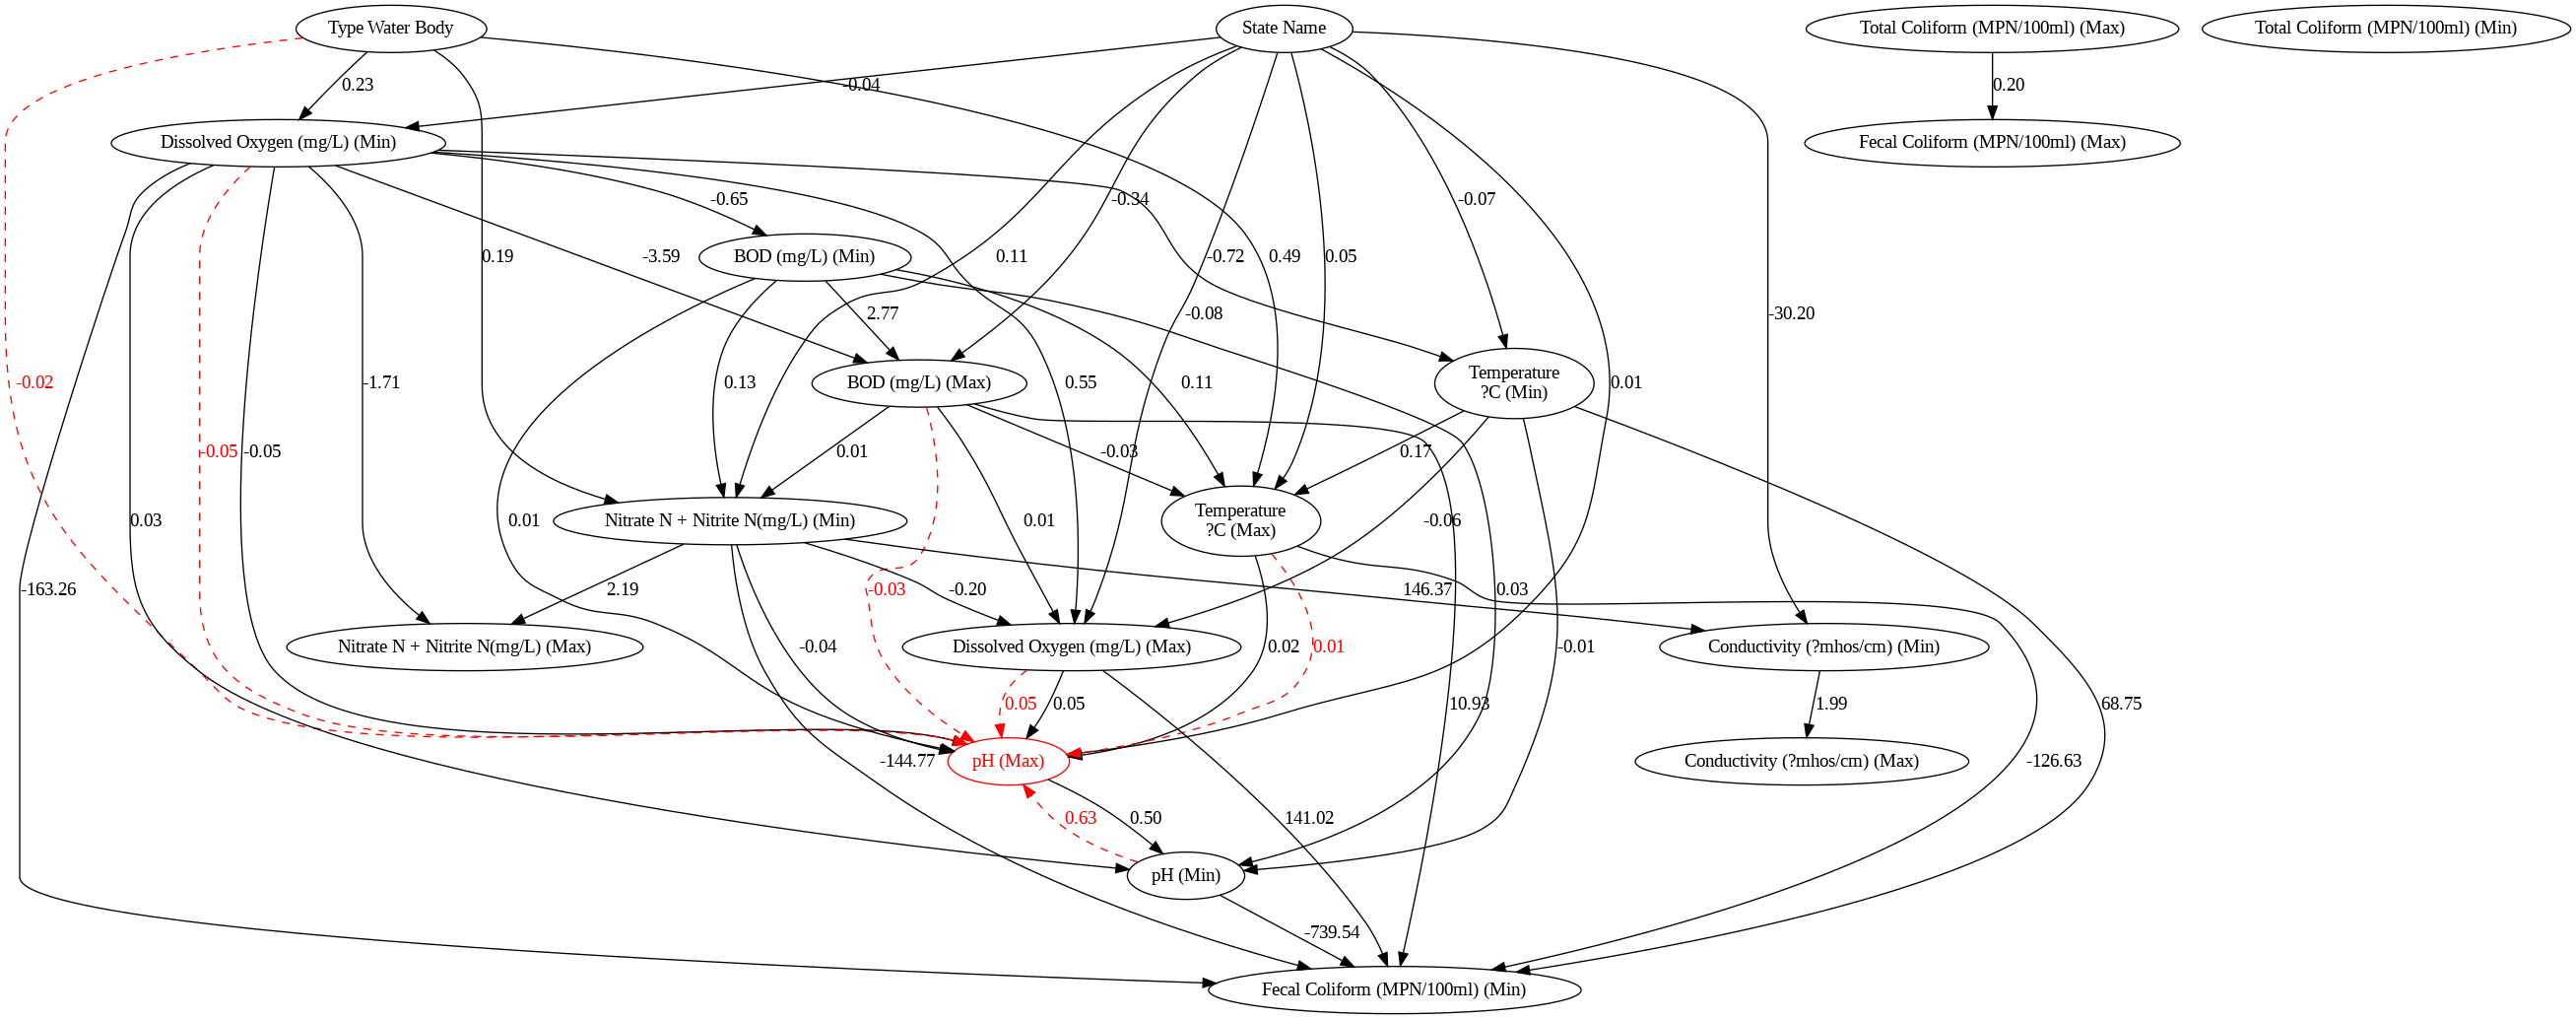

In [ ]:
features = [i for i in range(df_en.drop(["pH (Max)"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='pH (Max)',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")


* -2 LiNGAM with Linear Regression (Target Variable : "BOD (mg/L) (Max)")

In [ ]:
reg.fit(df_en.drop(["BOD (mg/L) (Max)"], axis=1), df_en["BOD (mg/L) (Max)"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


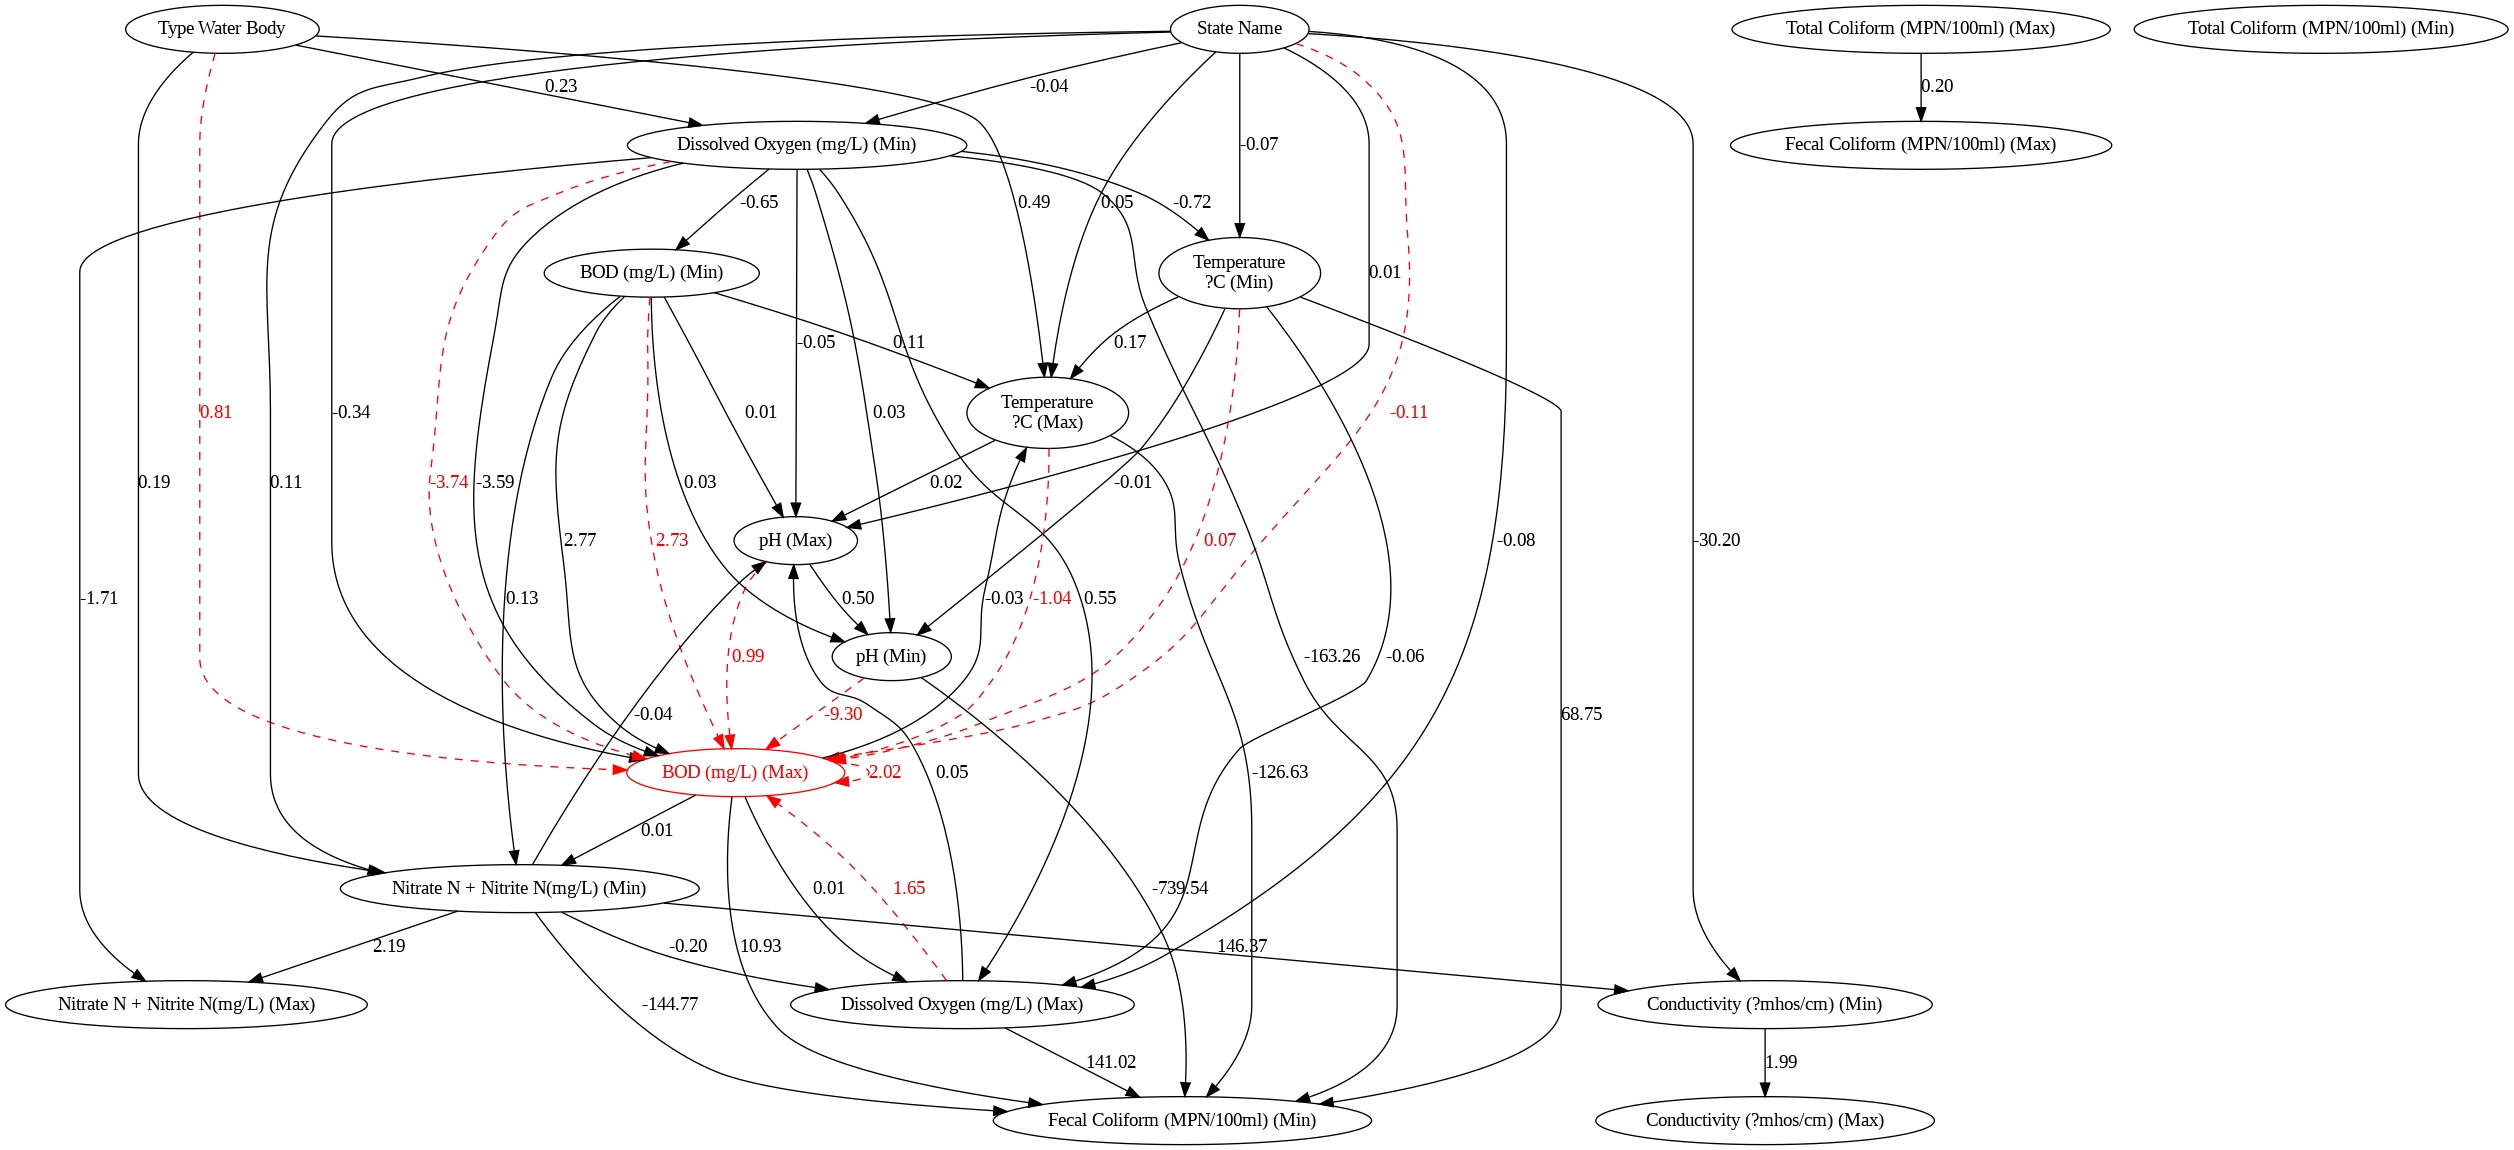

In [ ]:
features = [i for i in range(df_en.drop(["BOD (mg/L) (Max)"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='BOD (mg/L) (Max)',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

* **-3 LiNGAM with Linear Regression (Target Variable : "Fecal Coliform (MPN/100ml) (Min)")**

In [ ]:
reg.fit(df_en.drop(["Fecal Coliform (MPN/100ml) (Min)"], axis=1), df_en["Fecal Coliform (MPN/100ml) (Min)"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


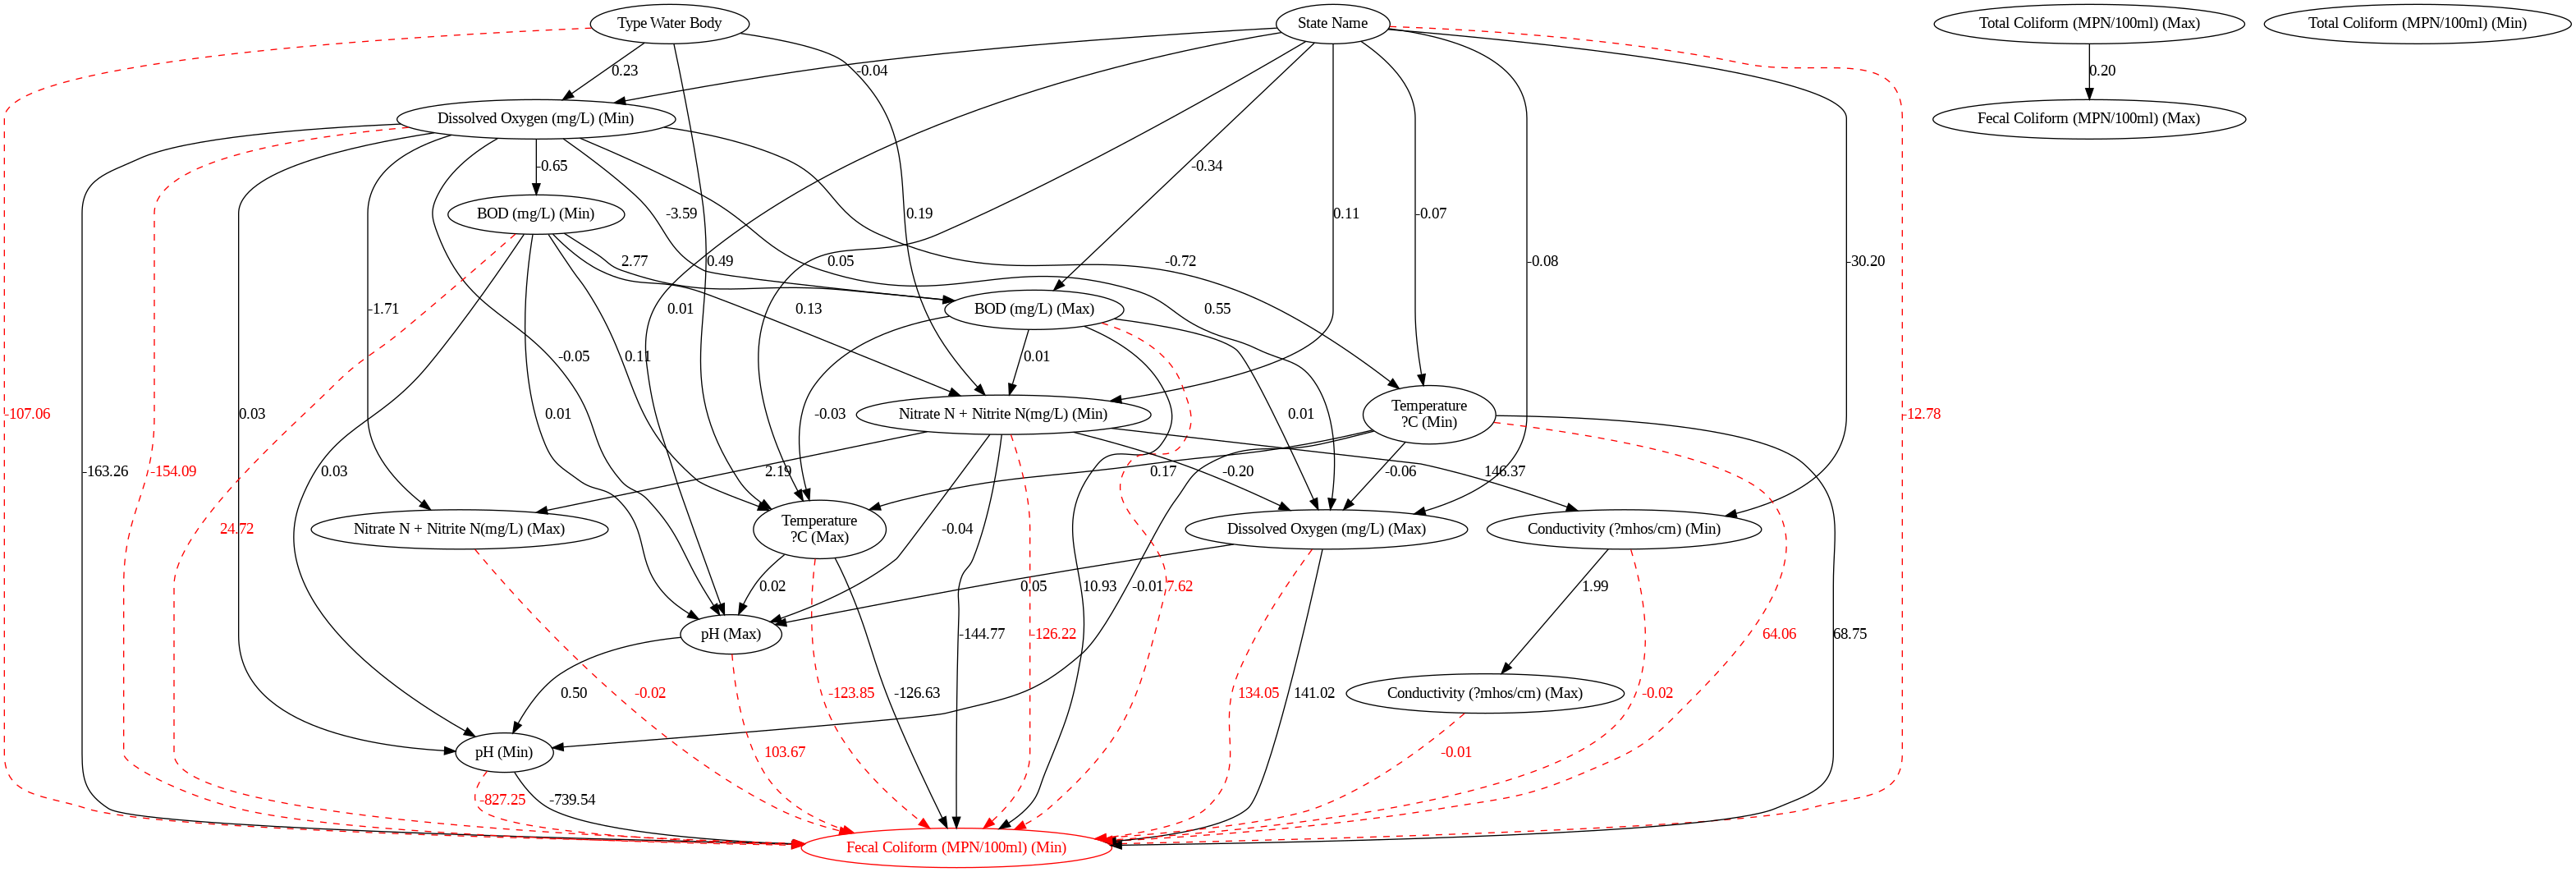

In [ ]:
features = [i for i in range(df_en.drop(["Fecal Coliform (MPN/100ml) (Min)"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='Fecal Coliform (MPN/100ml) (Min)',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

Example 2:

In this notebook, I have taken an example to understand the concept of "causal inference and causal discovery" in causality.


* **Causal inference** is a process used to determine the cause and effect relationship between variables. It goes beyond mere correlation or association by trying to establish whether changing one variable (the cause or treatment) directly influences another variable (the effect or outcome). .

I have taken the "Economics of Happiness" dataset to perform analysis to understand causal inference and to find the causal discovery. This dataset is a large database of various features that effect or cause an impact on happiness index of people.

In [ ]:
!pip install dowhy
!pip install causalinference
!pip install causalnex #this library makes use of the bayesian networks and machine learning to understand the causal reasoning

 Establishing causality between variables in a dataset, such as corruption, Freedom, and the happiness rank, requires careful analysis and adherence to principles of causal inference

In [ ]:
# load data
df = pd.read_csv("/content/TEH_World_Happiness_2015_2018_Imputed.csv")
df.head()

Country  Happiness rank  Happiness Score  GDP per capita  \
0  Switzerland               1            7.587         1.39651   
1      Iceland               2            7.561         1.30232   
2      Denmark               3            7.527         1.32548   
3       Norway               4            7.522         1.45900   
4       Canada               5            7.427         1.32629   

   Social support  Healthy life  Freedom  Generosity  Corruption  Year  
0         1.34951       0.94143  0.66557     0.29678     0.41978  2015  
1         1.40223       0.94784  0.62877     0.43630     0.14145  2015  
2         1.36058       0.87464  0.64938     0.34139     0.48357  2015  
3         1.33095       0.88521  0.66973     0.34699     0.36503  2015  
4         1.32261       0.90563  0.63297     0.45811     0.32957  2015

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          626 non-null    object 
 1   Happiness rank   626 non-null    int64  
 2   Happiness Score  626 non-null    float64
 3   GDP per capita   622 non-null    float64
 4   Social support   622 non-null    float64
 5   Healthy life     622 non-null    float64
 6   Freedom          622 non-null    float64
 7   Generosity       622 non-null    float64
 8   Corruption       620 non-null    float64
 9   Year             626 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 49.0+ KB


In [ ]:
#describing the dataset
df.describe()

Happiness rank  Happiness Score  GDP per capita  Social support  \
count      626.000000       626.000000      622.000000      622.000000   
mean        78.747604         5.372021        0.924672        1.052617   
std         45.219609         1.131774        0.404416        0.319079   
min          1.000000         2.693000        0.015300        0.104190   
25%         40.000000         4.497750        0.622672        0.852818   
50%         79.000000         5.307000        0.985745        1.082250   
75%        118.000000         6.187250        1.243355        1.284491   
max        158.000000         7.632000        2.096000        1.644000   

       Healthy life     Freedom  Generosity  Corruption         Year  
count    622.000000  622.000000  622.000000  620.000000   626.000000  
mean       0.588056    0.418379    0.228441    0.130179  2016.493610  
std        0.238123    0.151795    0.125943    0.108011     1.120339  
min        0.005565    0.005890    0.001990    0.001000  2015.000000  
25%        0.415013    0.312000    0.138527    0.057471  2015.000000  
50%        0.635165    0.435493    0.209145    0.094860  2016.000000  
75%        0.774117    0.539578    0.291473    0.161930  2017.000000  
max        1.030000    0.724000    0.838075    0.551910  2018.000000

In [ ]:
# to check the missing calues in dataset

df.isnull().sum()

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     4
Social support     4
Healthy life       4
Freedom            4
Generosity         4
Corruption         6
Year               0
dtype: int64

In [ ]:
#to present the unique values in the dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].unique()}")

# Checking for unique number of countries present in the dataset
unique_countries_count = df['Country'].nunique()
print(f"Number of unique countries: {unique_countries_count}")

Unique values in Country: ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'P

In [ ]:
#Let's drop the 'Country' and 'Happiness rank' columns from out dataset,
#Since we don't be needing the country column and
#we already have 'Happiness Score' which we will be considering as output variable
df = df.drop(['Country'], axis=1)
df = df.drop(['Happiness rank'], axis=1)

print(df.head())

   Happiness Score  GDP per capita  Social support  Healthy life  Freedom  \
0            7.587         1.39651         1.34951       0.94143  0.66557   
1            7.561         1.30232         1.40223       0.94784  0.62877   
2            7.527         1.32548         1.36058       0.87464  0.64938   
3            7.522         1.45900         1.33095       0.88521  0.66973   
4            7.427         1.32629         1.32261       0.90563  0.63297   

   Generosity  Corruption  Year  
0     0.29678     0.41978  2015  
1     0.43630     0.14145  2015  
2     0.34139     0.48357  2015  
3     0.34699     0.36503  2015  
4     0.45811     0.32957  2015  


                 Happiness Score  GDP per capita  Social support  \
Happiness Score         1.000000        0.793169        0.622214   
GDP per capita          0.793169        1.000000        0.547970   
Social support          0.622214        0.547970        1.000000   
Healthy life            0.757339        0.794943        0.500039   
Freedom                 0.545924        0.343814        0.454299   
Generosity              0.152348        0.006776       -0.004733   
Corruption              0.405835        0.322495        0.130130   
Year                   -0.002727        0.046911        0.374198   

                 Healthy life   Freedom  Generosity  Corruption      Year  
Happiness Score      0.757339  0.545924    0.152348    0.405835 -0.002727  
GDP per capita       0.794943  0.343814    0.006776    0.322495  0.046911  
Social support       0.500039  0.454299   -0.004733    0.130130  0.374198  
Healthy life         1.000000  0.350848    0.069981    0.274956 -0.050005  
Freedom

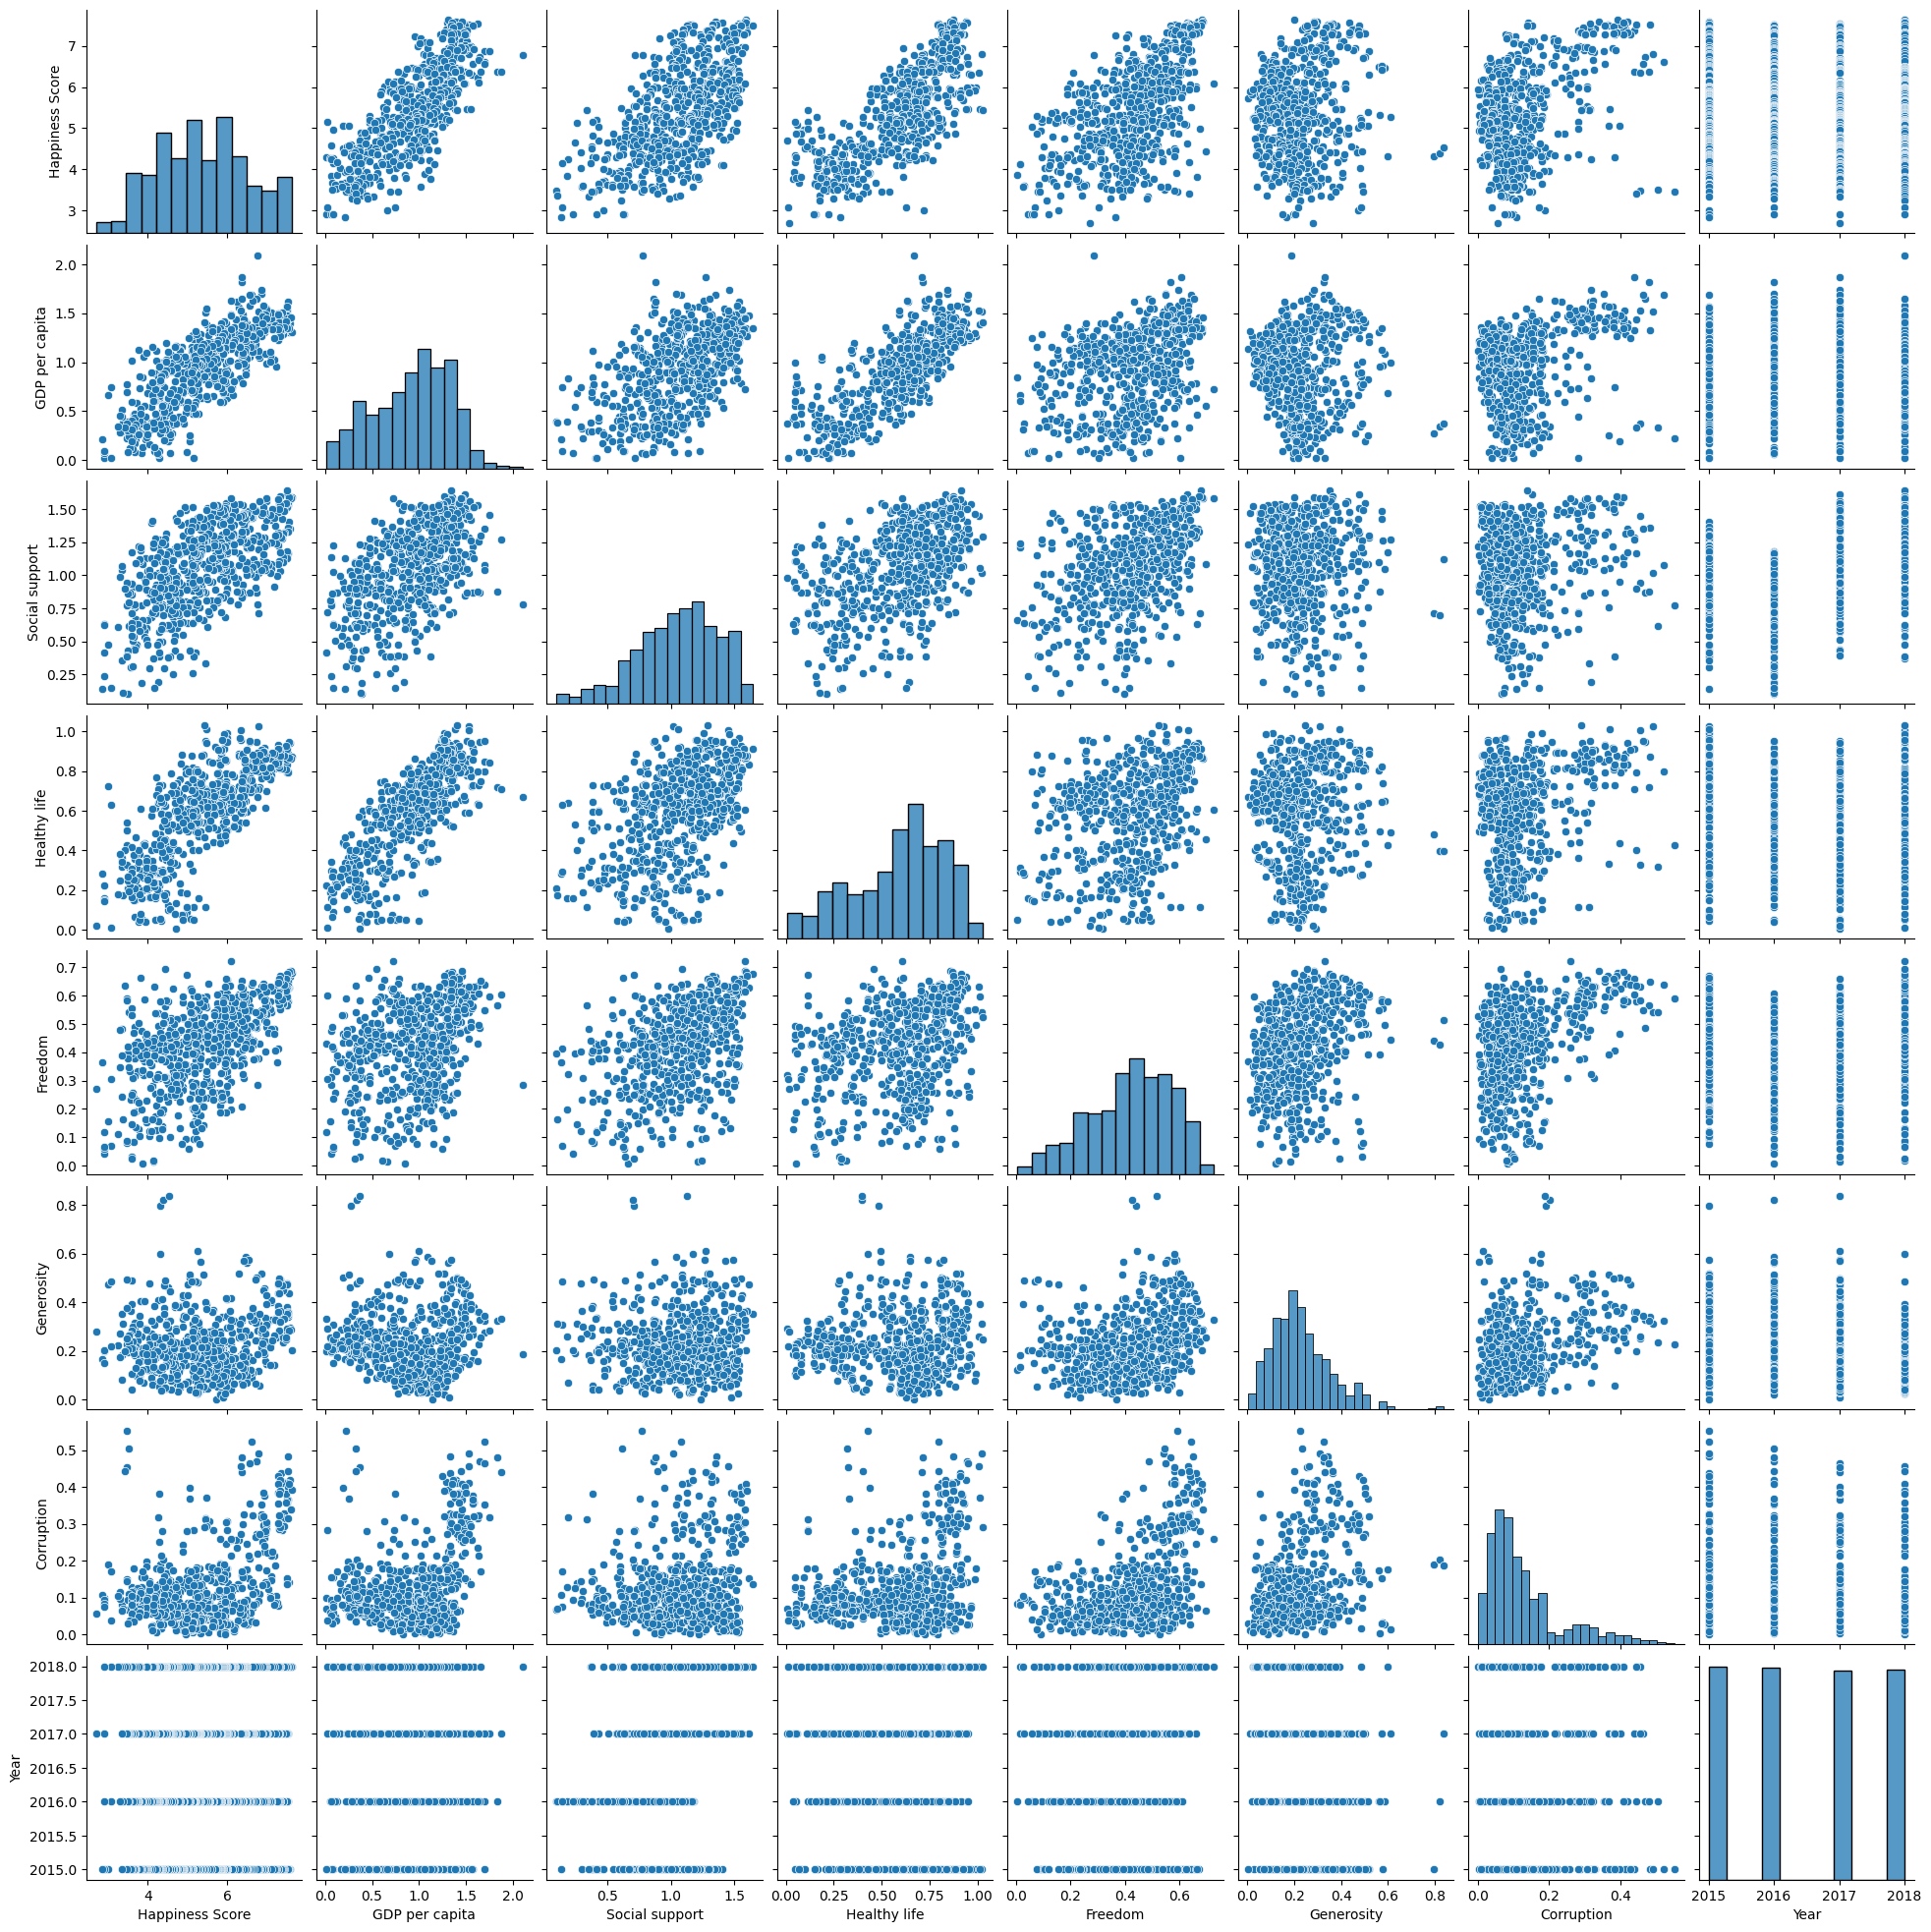

In [ ]:
#Pearson correlation coefficients, to measure the strength and direction of linear relationships between pairs of continuous variables.
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

#Visualizing relationships using pair plots or heatmaps
sns.pairplot(df)
plt.show()

* There's a strong positive correlation between GDP per capita and happiness scores, highlighting the significant role economic prosperity plays in influencing happiness.



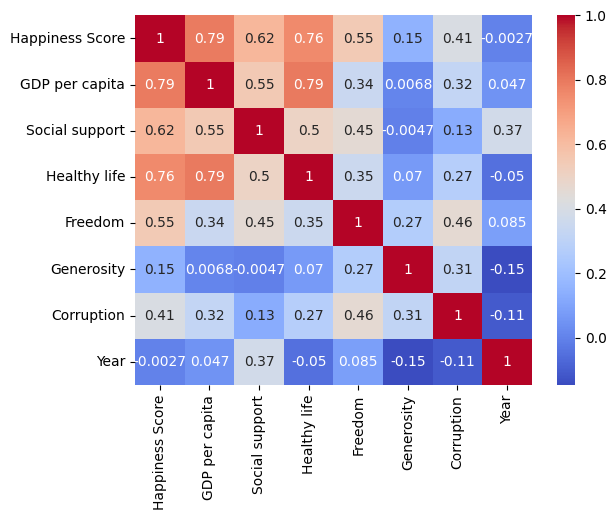

In [ ]:
#Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

The correlation coefficients in the matrix represent the strength and direction of linear relationships between pairs of variables. Here's an interpretation of the correlation coefficients:

* Happiness Score vs. Other Variables:
GDP per capita (0.793925): There is a strong positive correlation between GDP per capita and Happiness Score. As the GDP per capita increases, the Happiness Score tends to increase as well.

* Social Support (0.637676): There is a positive correlation between Social Support and Happiness Score, indicating that countries with higher social support tend to have higher happiness scores.

* Healthy Life (0.744793): There is a strong positive correlation between Healthy Life and Happiness Score, suggesting that countries with better health conditions tend to have higher happiness scores.

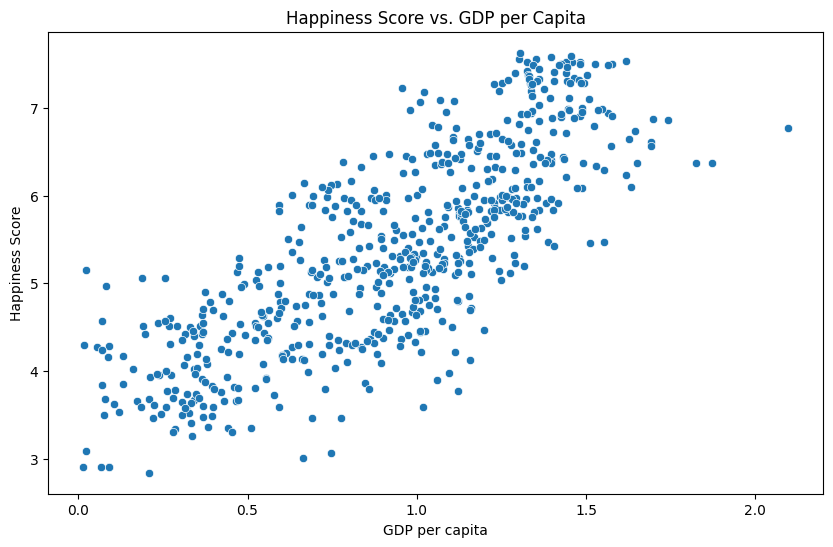

In [ ]:
#Lets see a scatter plot between Happiness Score and GDP per Capita,
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Happiness Score', data=df)
plt.title('Happiness Score vs. GDP per Capita')
plt.show()

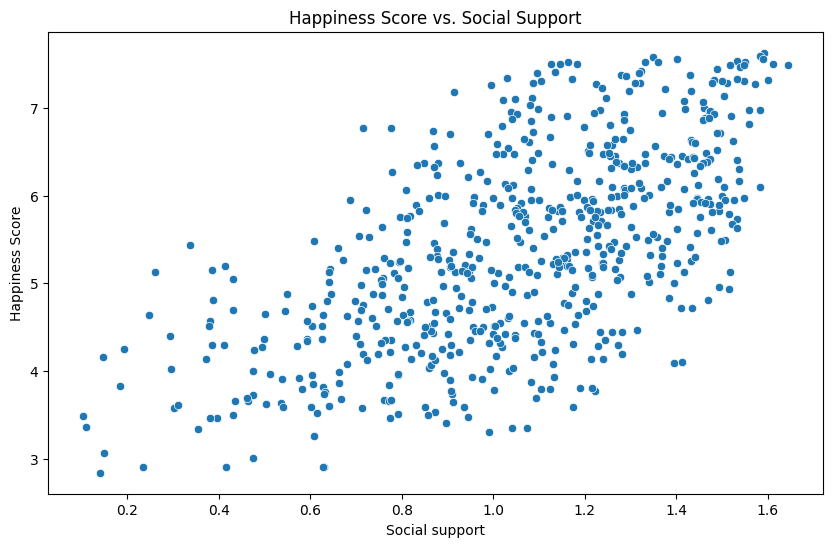

In [ ]:
#Lets see a scatter plot between Happiness Score and Social Support,
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness Score', data=df)
plt.title('Happiness Score vs. Social Support')
plt.show()

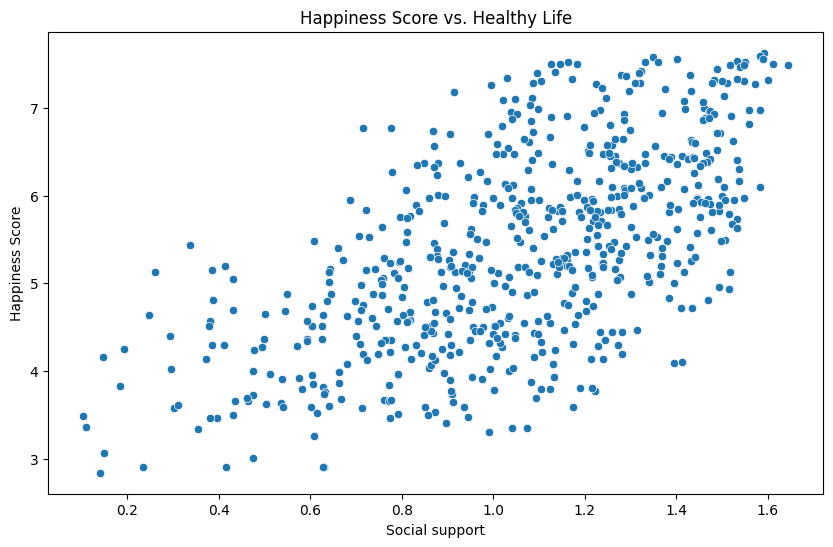

In [ ]:
#Lets see a scatter plot between Happiness Score and Social Support,
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness Score', data=df)
plt.title('Happiness Score vs. Healthy Life')
plt.show()

In [ ]:

import statsmodels.api as sm

#Dropping the missing value rows
df_cleaned = df.dropna()

X = df_cleaned[['GDP per capita', 'Social support', 'Healthy life', 'Freedom']]
X = sm.add_constant(X)
y = df_cleaned['Happiness Score']


In [ ]:
#Linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     462.8
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          3.57e-181
Time:                        20:08:36   Log-Likelihood:                -501.07
No. Observations:                 601   AIC:                             1012.
Df Residuals:                     596   BIC:                             1034.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2419      0.087     25.


The Ordinary Least Squares (OLS) regression results indicate that the model is statistically significant in explaining the variation in the Happiness Score.

* From the above OLS analysis; The R-squared value of 0.756 suggests that approximately 75.6% of the variability in Happiness Score can be explained by the included independent variables (GDP per capita, Social support, Healthy life, and Freedom).

* The adjusted R-squared, accounting for the number of predictors, remains high at 0.755. The individual coefficients reveal the estimated impact of each independent variable on Happiness Score, with all variables—GDP per capita, Social support, Healthy life, and Freedom—demonstrating statistically significant effects. For instance, a one-unit increase in GDP per capita is associated with a 1.1616-unit rise in Happiness Score, while similar interpretations apply to the other variables.

* The overall F-statistic is highly significant (p-value < 0.001), indicating that the model is collectively significant. However, considerations should be made for the normality of residuals, as suggested by the Omnibus and Jarque-Bera tests, and potential multicollinearity concerns indicated by the condition number.

The Durbin-Watson statistic suggests no apparent autocorrelation in the residuals. In summary, the model effectively captures a substantial portion of the variability in Happiness Score, providing valuable insights into the influence of the included factors.

### Let see the effect of time on Happiness Score, is it increasing with time or is it decreasing?

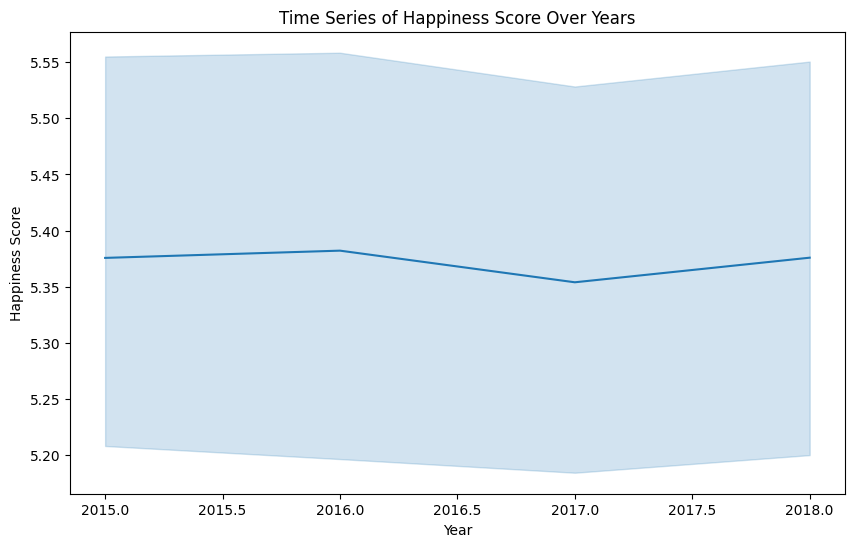

In [ ]:
df_sorted = df.sort_values(by='Year')


# Time series plot for Happiness Score
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Happiness Score', data=df_sorted)
plt.title('Time Series of Happiness Score Over Years')
plt.show()

From above we can suggest that their in no constant increase or decrease in happiness score wrt time. Their are ups and downs. So we can state that happiness score doesn't depend on time.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_cleaned2 = df_cleaned
data = df_cleaned2
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# Fit a linear regression model
model = LinearRegression()
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
model.fit(train_data[features], train_data['Happiness Score'])
test_predictions = model.predict(test_data[features])
# Model performance evaluation
mse = mean_squared_error(test_data['Happiness Score'], test_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.29565916166097767


In [ ]:
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
print(train_data[features].head())

     GDP per capita  Social support  Healthy life   Freedom
9          1.333580         1.30923      0.931560  0.651240
387        1.069318         1.25819      0.650785  0.208716
542        1.039000         1.49800      0.700000  0.307000
194        1.342530         1.12945      0.878960  0.375450
136        0.757780         0.86040      0.166830  0.103840


In [ ]:
print(train_data[features].shape)

(480, 4)


Now to perform causal inference analysis for each individual feature to estimate its impact on the 'Happiness Score' while controlling for the effects of other features. The DoWhy library is used to handle the causal modeling, identification, and estimation steps, providing a systematic approach to causal inference.

In [ ]:
!pip install dowhy
from dowhy import CausalModel



In [ ]:



data = df_cleaned2.copy()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model for the outcome variable ('Happiness Score')
model = LinearRegression()
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']

model.fit(train_data[features], train_data['Happiness Score'])

# Predict the outcome variable on the test set
test_data['Predicted Happiness Score'] = model.predict(test_data[features])

# Assess the performance of the linear regression model
mse = mean_squared_error(test_data['Happiness Score'], test_data['Predicted Happiness Score'])
print(f'Mean Squared Error (MSE) of the model: {mse}')

# Perform causal inference using DoWhy for each feature
for feature in features:
    print(f"\nCausal Inference for {feature} as the treatment variable:")

    # Create a causal model for the specific feature
    causal_model = CausalModel(
        data=train_data,
        treatment=feature,
        outcome='Happiness Score',
        common_causes=[col for col in features if col != feature]
    )

    # Identify the causal effect
    identified_estimand = causal_model.identify_effect()

    # Estimate the causal effect using linear regression
    causal_estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Print the estimated average treatment effect
    print(f'Estimated Average Treatment Effect: {causal_estimate.value}')

Mean Squared Error (MSE) of the model: 0.29565916166097767

Causal Inference for GDP per capita as the treatment variable:
Estimated Average Treatment Effect: 1.1139278024462538

Causal Inference for Social support as the treatment variable:


Estimated Average Treatment Effect: 0.5777472600272642

Causal Inference for Healthy life as the treatment variable:
Estimated Average Treatment Effect: 1.2231211171515817

Causal Inference for Freedom as the treatment variable:
Estimated Average Treatment Effect: 1.848125183996788


Let's break down the key findings:

In summary, these estimated treatment effects provide insights into the average impact of changes in each respective feature on the 'Happiness Score' based on the causal inference model. The larger the estimated effect, the stronger the perceived influence of that feature on happiness. Keep in mind that these are average effects, and individual responses may vary




#### Matching or Propensity Score Matching:

For estimating the causal effects of features on the outcome variable ('Happiness Score') using propensity score matching and the DoWhy library.

*  Propensity scores are used to create matched pairs of treated and control units, and causal inference is then performed on the matched dataset to estimate the average treatment effect for each feature

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Use LinearRegression for continuous outcome
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from dowhy import CausalModel

# Assume you have a cleaned dataset named 'df_cleaned2'
data = df_cleaned2.copy()

# Specify the columns in your dataset
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
treatment_variable = 'Happiness Score'
outcome_variable = 'Happiness Score'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model for the treatment variable
linear_model = LinearRegression()
linear_model.fit(train_data[features], train_data[treatment_variable])

# Predict propensity scores on the training set
train_data['Propensity Score'] = linear_model.predict(train_data[features])

# Apply propensity score matching
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data[features])
scaled_treatment = np.array(train_data['Propensity Score']).reshape(-1, 1)

# Use nearest neighbors to find matches with a larger number of neighbors (e.g., 5)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(np.hstack([scaled_features, scaled_treatment]))

# Find nearest neighbors in the test set
test_data['Propensity Score'] = linear_model.predict(test_data[features])
scaled_test_features = scaler.transform(test_data[features])
scaled_test_treatment = np.array(test_data['Propensity Score']).reshape(-1, 1)

distances, indices = neighbors.kneighbors(np.hstack([scaled_test_features, scaled_test_treatment]))

# Create matched dataset
matched_data = train_data.iloc[indices.flatten()]

# Perform causal inference using DoWhy for each feature
for feature in features:
    # Perform causal inference using the matched data
    causal_model_matched = CausalModel(
        data=matched_data,
        treatment=feature,
        outcome=outcome_variable,
        common_causes=[col for col in features if col != feature]
    )

    # Identify the causal effect
    identified_estimand = causal_model_matched.identify_effect()

    # Estimate the causal effect using linear regression
    causal_estimate = causal_model_matched.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Print the estimated average treatment effect
    print(f'Estimated Average Treatment Effect with Propensity Score Matching for {feature}: {causal_estimate.value}')

Estimated Average Treatment Effect with Propensity Score Matching for GDP per capita: 1.2825187911725306
Estimated Average Treatment Effect with Propensity Score Matching for Social support: 0.6304747534214616
Estimated Average Treatment Effect with Propensity Score Matching for Healthy life: 1.2258911374750667
Estimated Average Treatment Effect with Propensity Score Matching for Freedom: 1.8034819139440499


Above values provide an estimate of the average change in the outcome variable (Happiness Score) when the specified feature is increased by one unit, considering the matched control and treatment groups based on propensity scores. These estimates are derived from the propensity score matching method and are used to infer causal relationships from observational data.

* **Consistent Positive Effects:** In both methods, Social support, Healthy life, and Freedom consistently show substantial positive effects on Happiness Score.

* **GDP per Capita Influence:**GDP per capita has a positive effect, but the magnitude is smaller compared to the other features.

* **Methodological Consistency:** While there are differences in the estimated magnitudes between the two methods, the general trend is similar.

**Key Takeaways:**

These results suggest that Social support, Healthy life, and Freedom may have a stronger positive influence on Happiness Score, according to the specific context and assumptions made in the analysis.

GDP per capita contributes positively to happiness but with a comparatively smaller impact.

The estimated effects are averages, and individual variations may exist.

####**Conclusion:**

The causal analyses consistently highlighted the positive impact of GDP per capita, Social support, Healthy life, and Freedom on happiness.

While each method provided valuable insights, it's crucial to acknowledge the assumptions and limitations inherent in causal inference.

In summary, these results suggest that Social support, Healthy life, and Freedom may have a stronger positive influence on Happiness Score, according to the specific context and assumptions made in the analysis.

###**License:**

Copyright (c) 2024 Anushree Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

###**References:**

https://medium.com/@tanakaryo/overview-of-causal-discovery-and-lingam-as-representative-method-0f0e8c36c339


https://towardsdatascience.com/estimate-the-causal-effect-intervention-on-time-series-with-causalimpact-e949c5cd4147

https://www.pywhy.org/dowhy/v0.8/example_notebooks/nb_index.html

https://research.google/pubs/inferring-causal-impact-using-bayesian-structural-time-series-models/

https://causalnex.readthedocs.io/en/0.4.2/01_introduction/01_introduction.html

https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Structure-Learning